# scRNAseq: Epithelial-Mesenchymal Transition in Cancer
Dataset 1 from: [Pastushenko et al. 2018](https://login.libproxy2.usc.edu/login?qurl=https://www.nature.com%2farticles%2fs41586-018-0040-3)

In [1]:
import os
currDir = os.getcwd()

In [2]:
run_name = "Pastushenko"
dataset_name = "1-Pastushenko"

## Run Settings

Import Pastushenko functions

In [3]:
os.chdir(currDir)
%run Pastushenko_functions.ipynb
setDirectories(dataset_name, run_name)

In [4]:
sc.settings.set_figure_params(dpi=150, figsize=[5,5])
plt.rcParams['figure.figsize']=(5,5)

Import settings for current run

In [5]:
run_settings = importSettings(run_name)

total_counts_cutoff = run_settings["total_counts_cutoff"]
mito_cutoff = run_settings["mito_cutoff"]
ribo_cutoff = run_settings["ribo_cutoff"]
leiden_resolution = run_settings["leiden_resolution"]
EMT_clusters_in_order = run_settings["EMT_clusters_in_order"].split(",")
EMT_clusters_in_order = [int(i) for i in EMT_clusters_in_order]
pseudotime_DC = run_settings["pseudotime_DC"]
pseudotime_DC_rootNodes = run_settings["pseudotime_DC_rootNodes"]

# Add markers for visualization, if wanted
run_E_markers = run_settings["run_E_markers"].split(", ") if str(run_settings["run_M_markers"]) != "nan" else ""
run_M_markers = run_settings["run_M_markers"].split(", ") if str(run_settings["run_M_markers"]) != "nan" else ""

## Part 1: IMPORT DATA, FILTERING, AND NORMALIZATION

In [6]:
adata = importData(dataset_name, run_name)
adata = filterData(adata)
adata = find_Mito(adata)
adata = filter_MitoRibo(adata, total_counts_cutoff, mito_cutoff, ribo_cutoff, run_name, dataset_name)
saveFilteredData(adata, run_name)
adataHiVar = normalize_and_hiVar_Data(adata, run_name)

In [7]:
check_cell_cycle(run_name)

## Part 2: EMTSCORE AND CLUSTERING

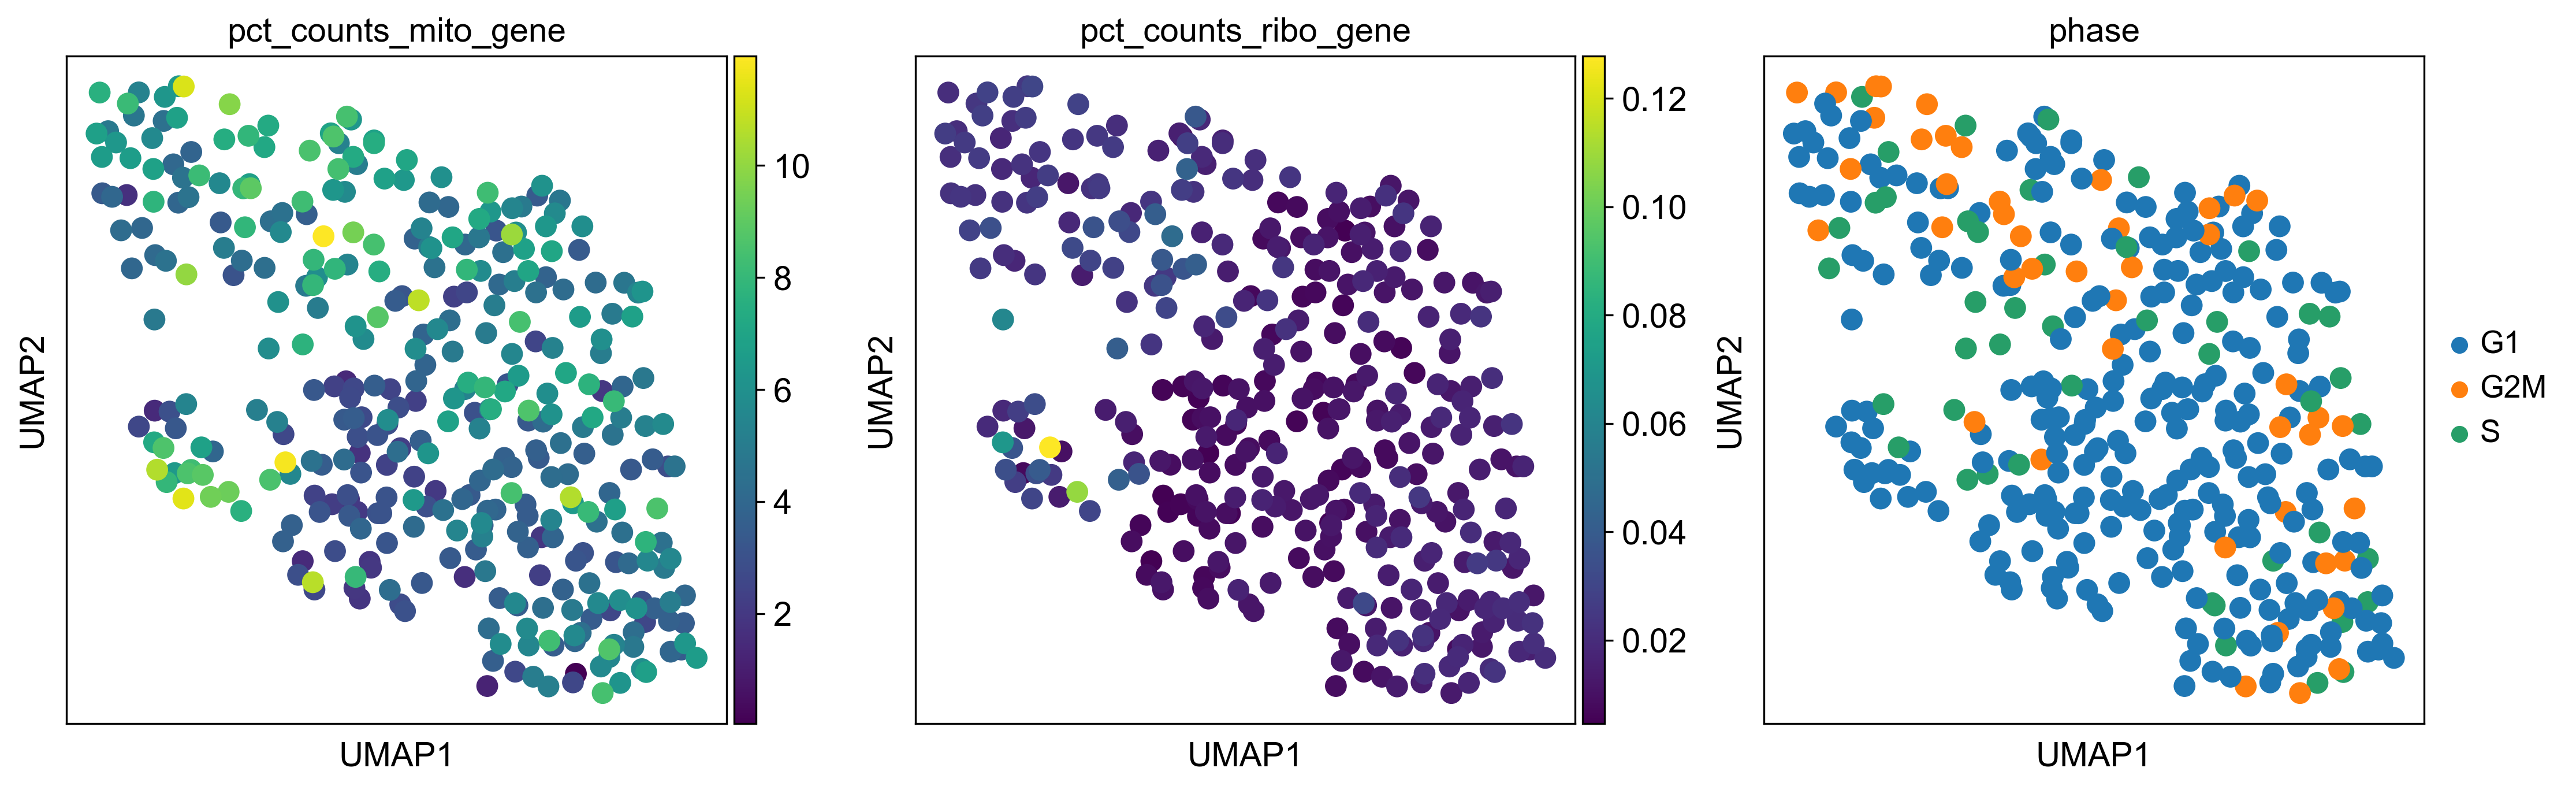

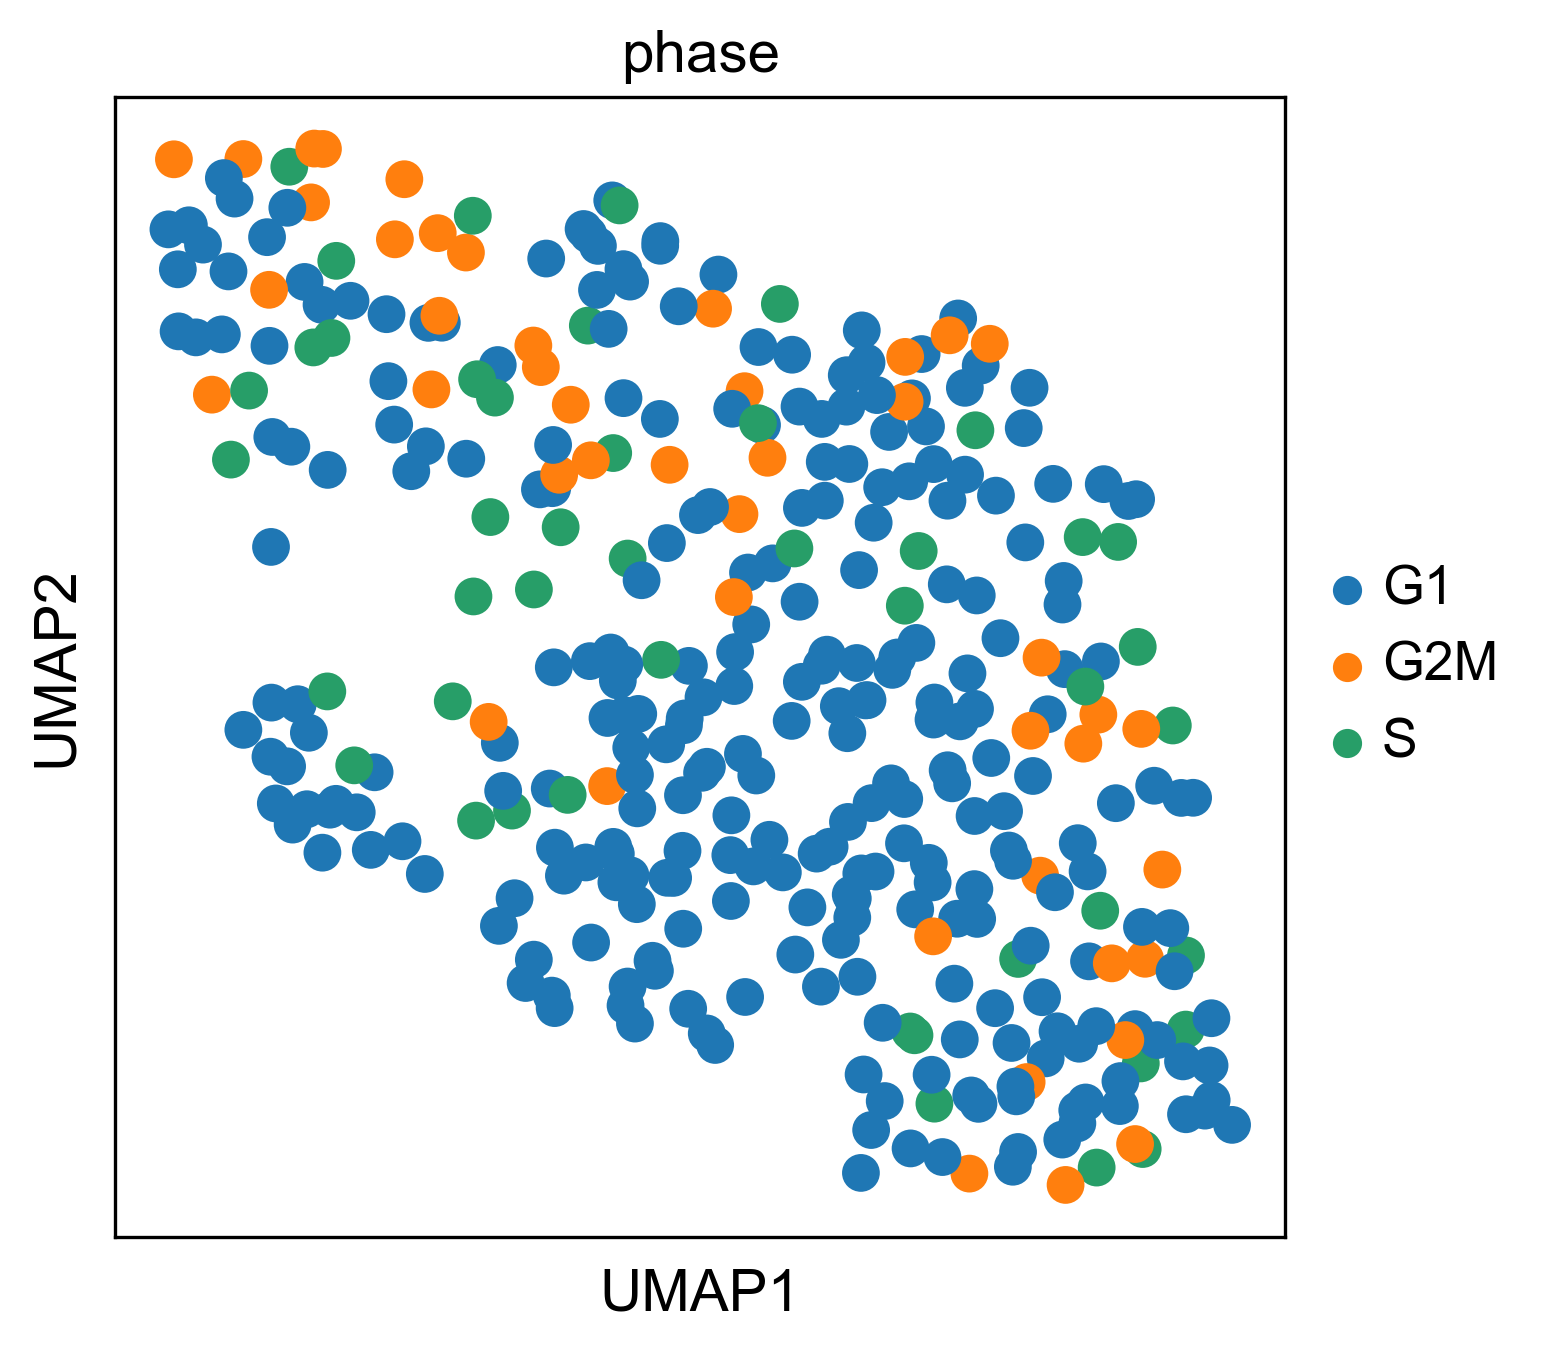

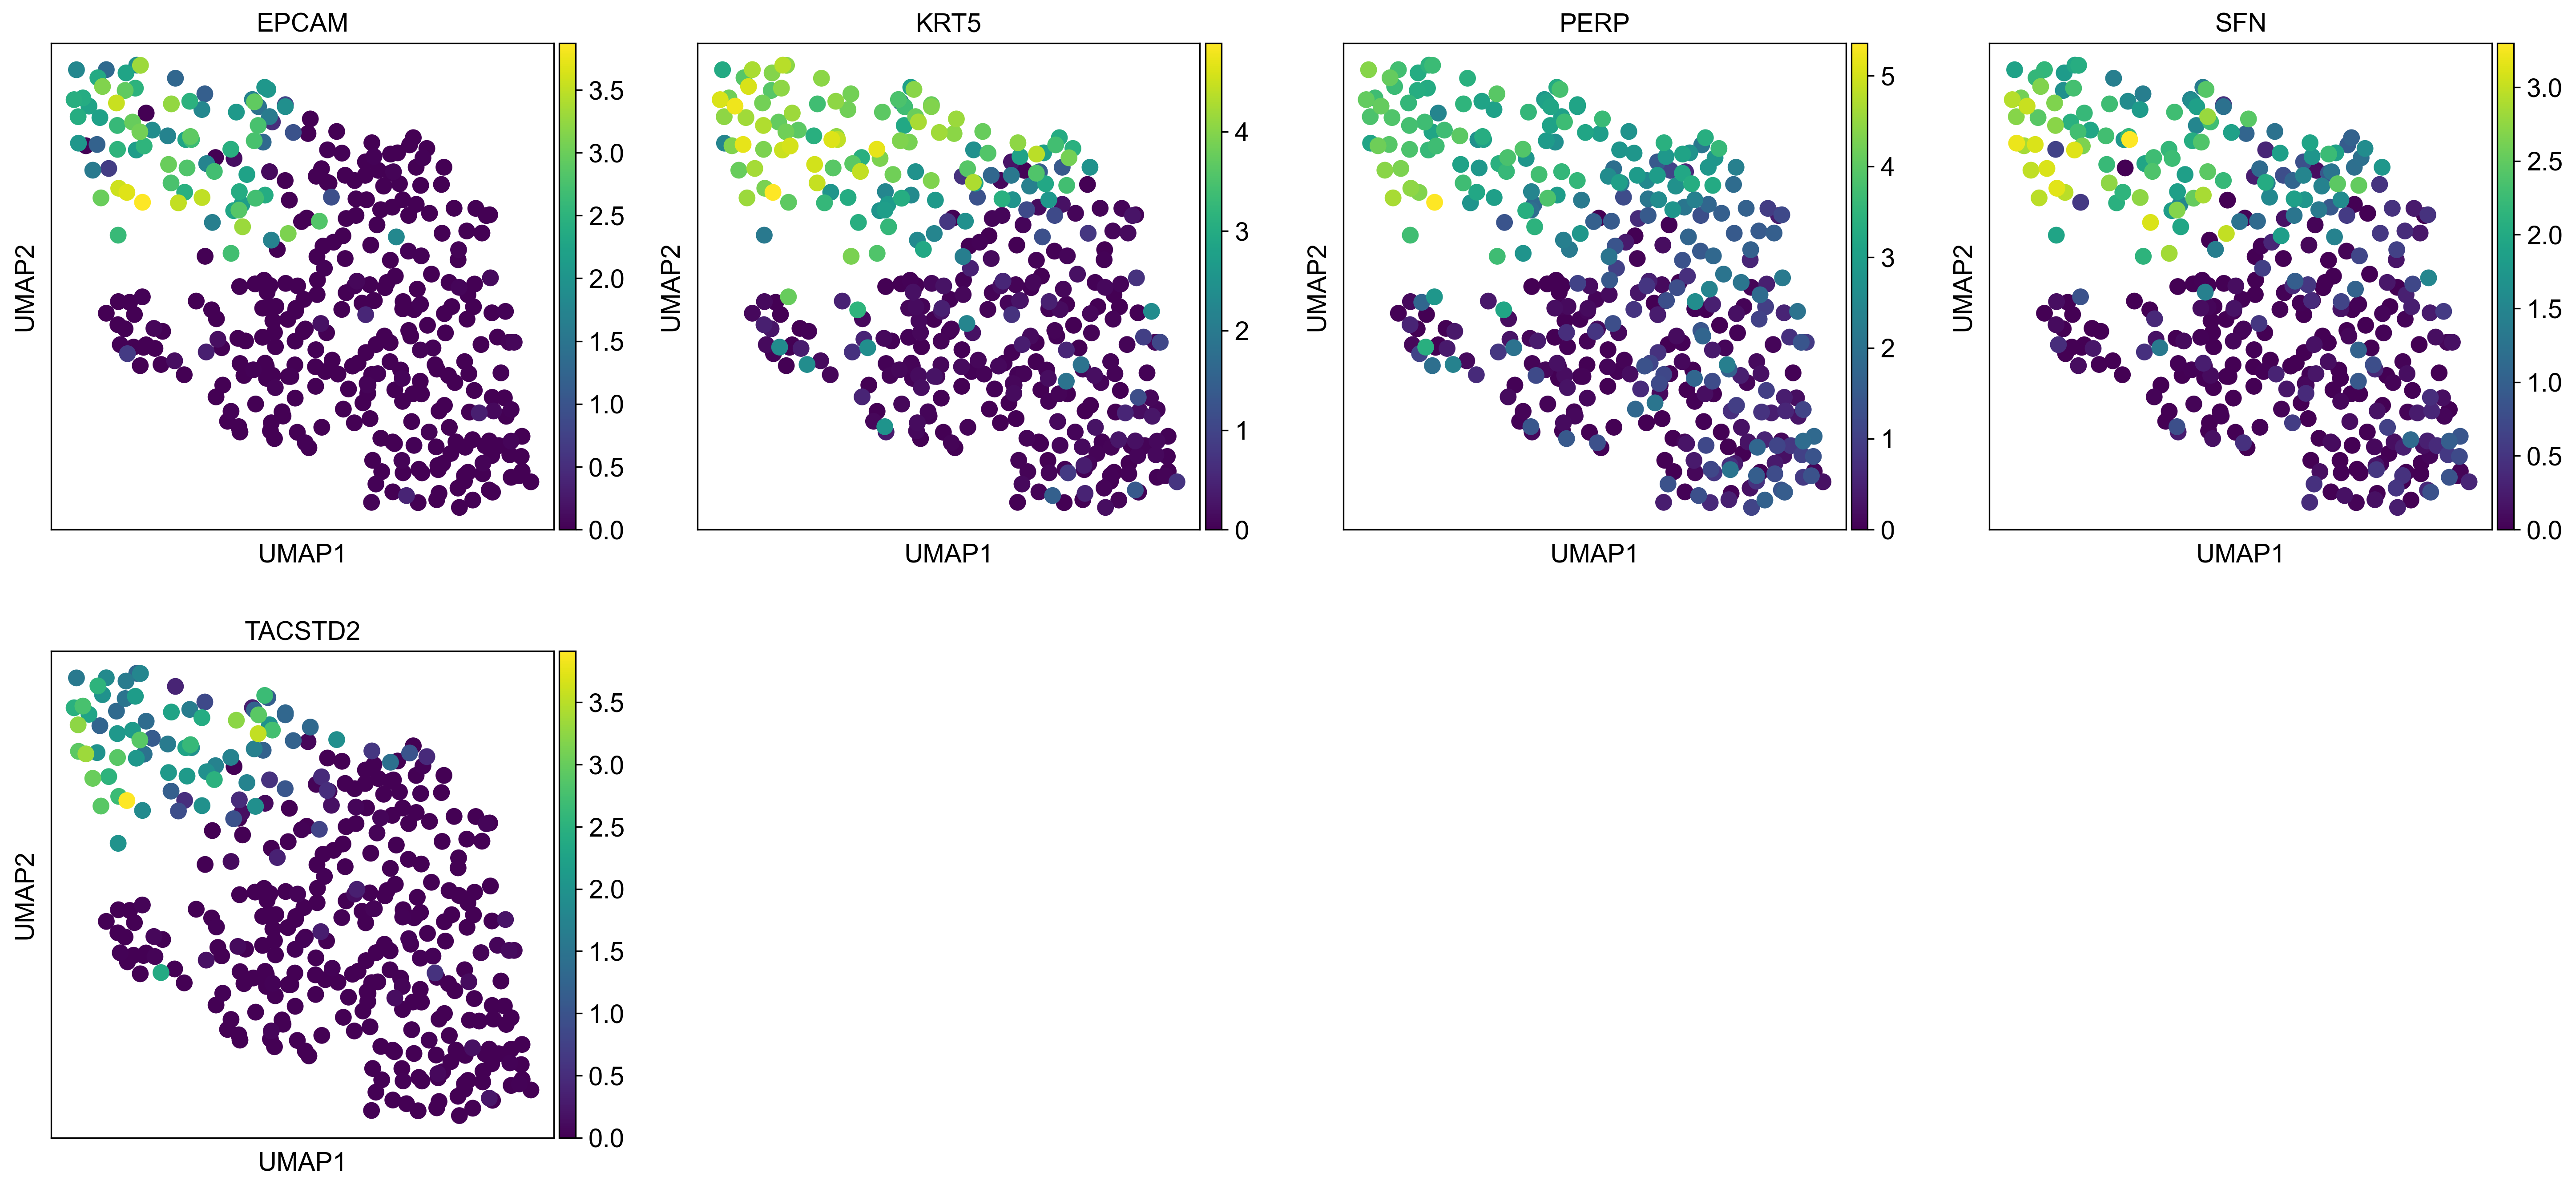

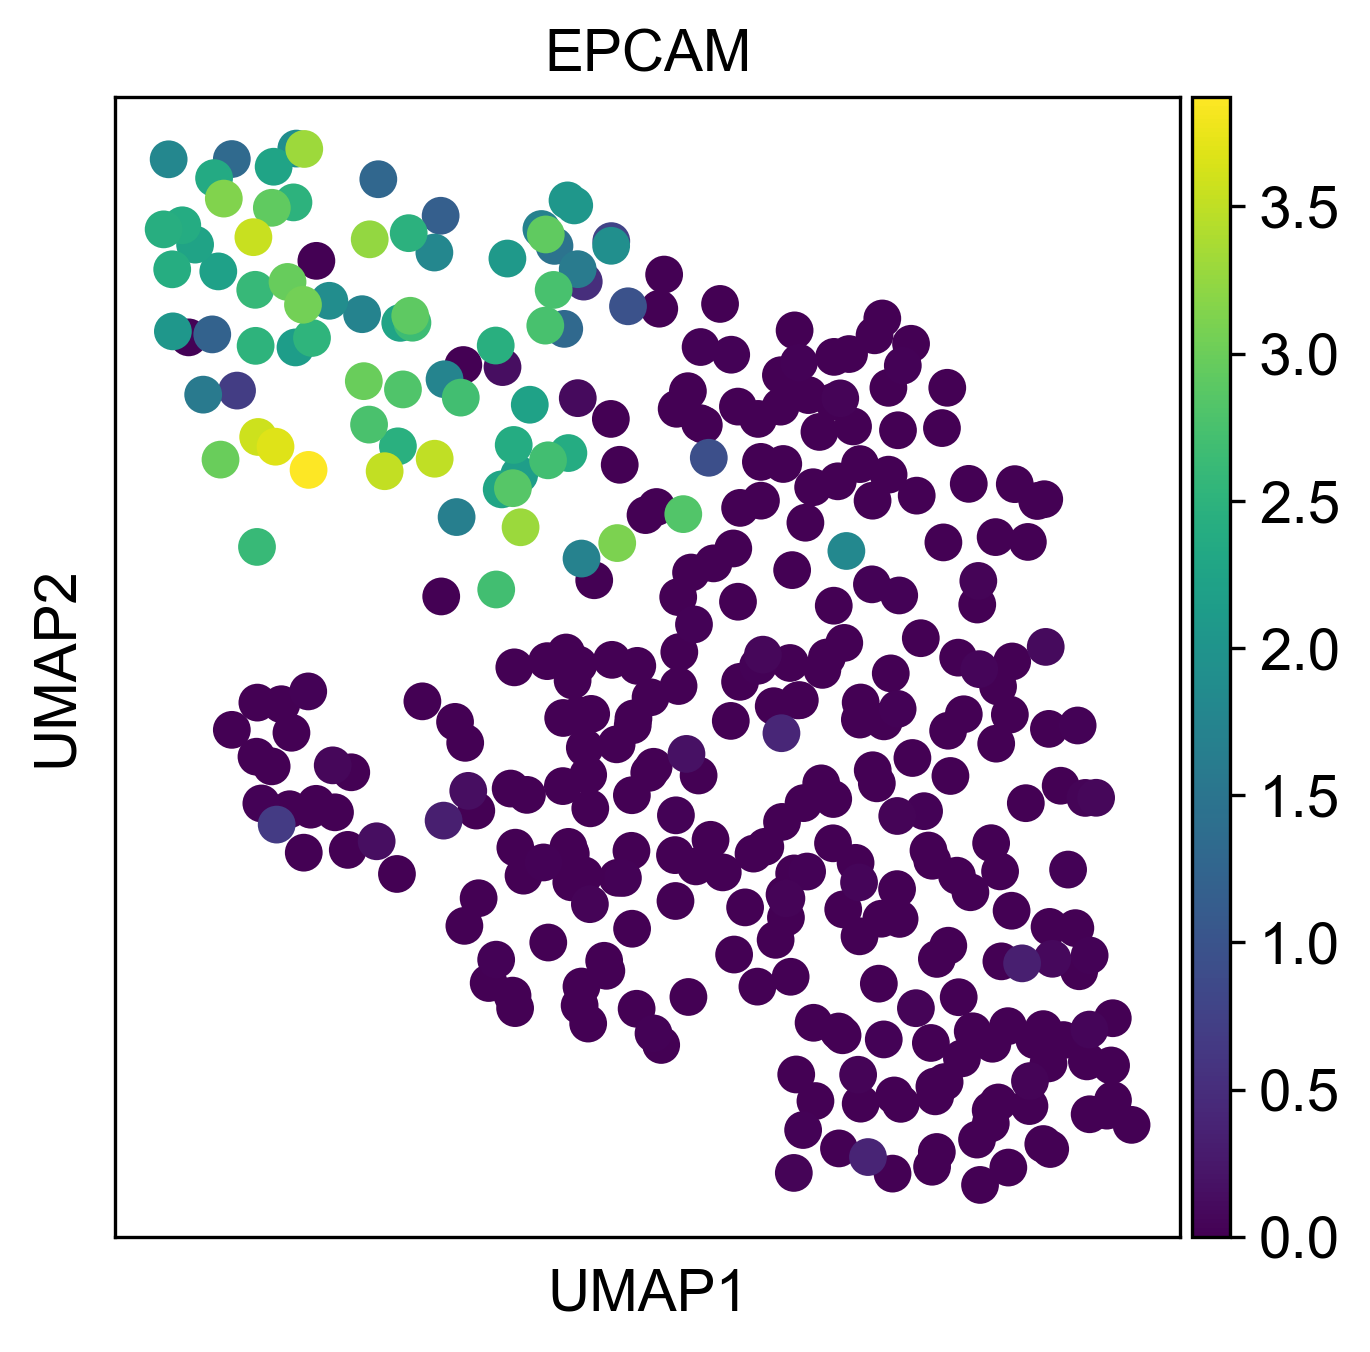

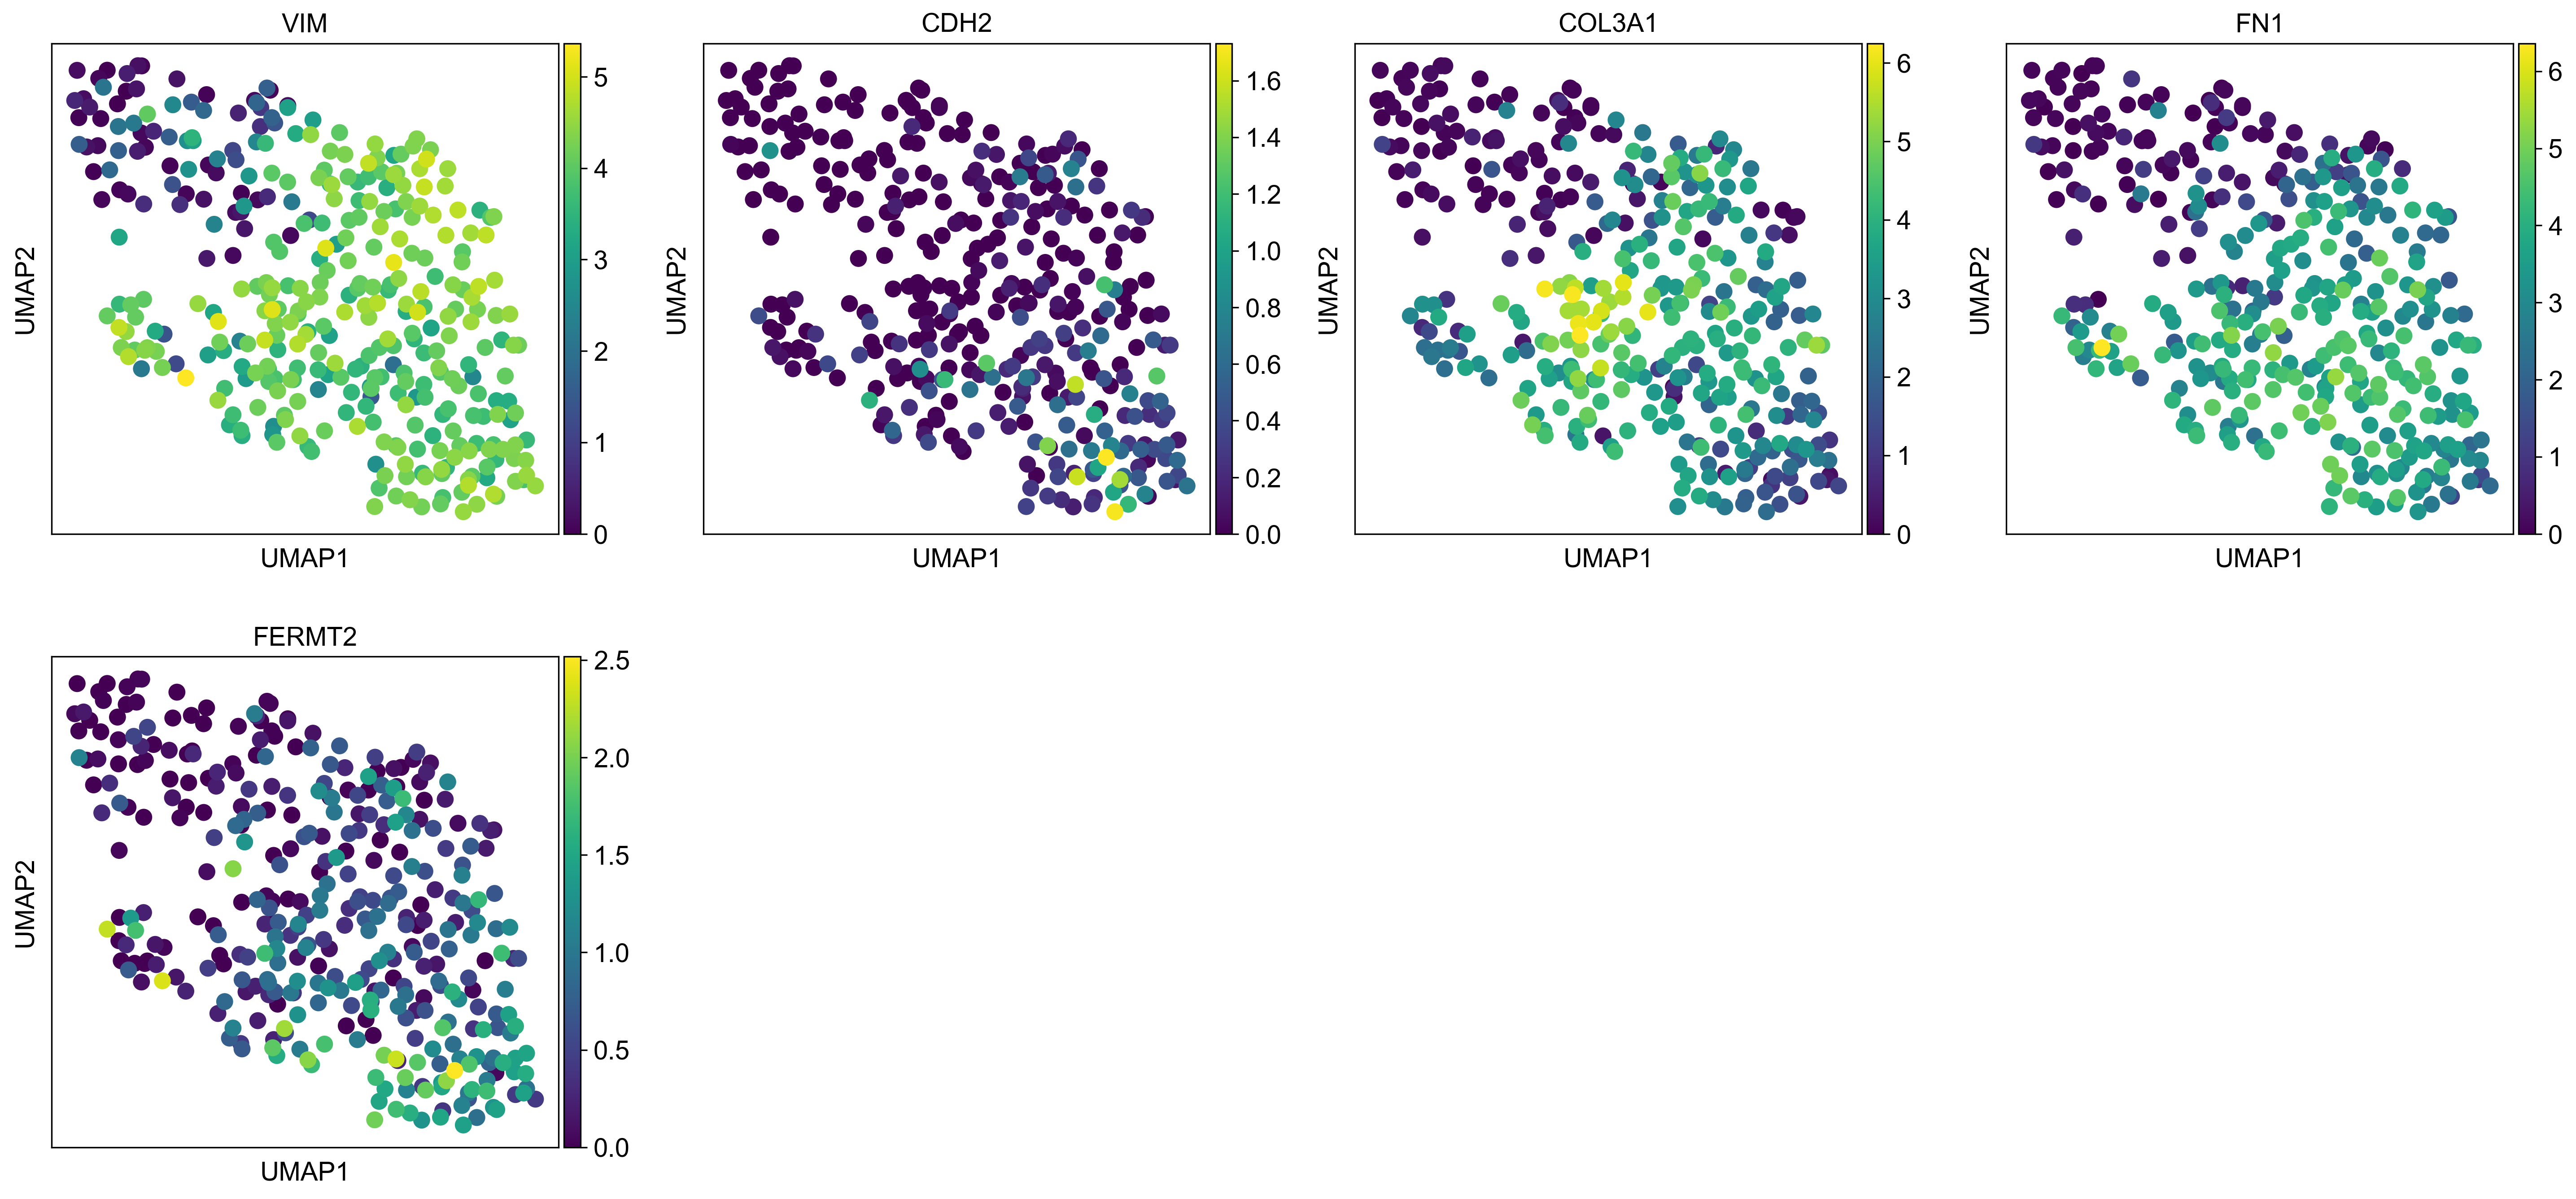

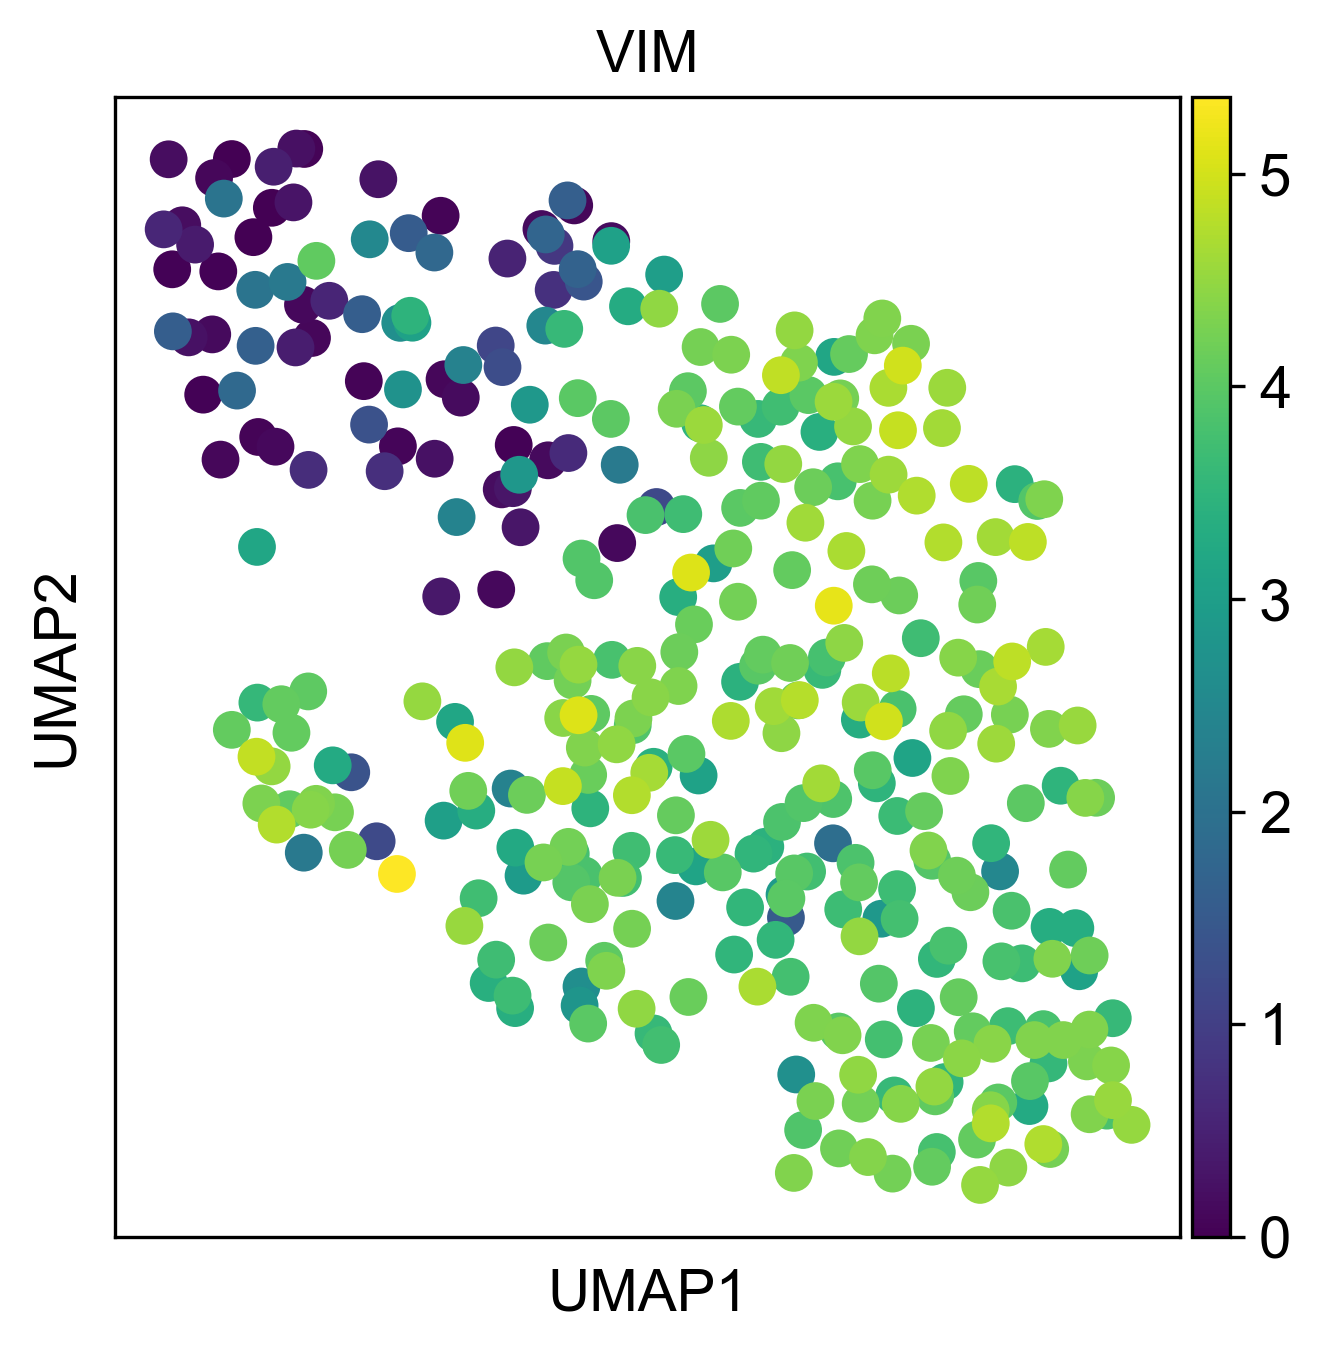

In [8]:
adataHiVar, df_normalized = importProcessedData(dataset_name, run_name)
adataHiVar = PCA(adataHiVar)
adataHiVar = UMAP(adataHiVar)

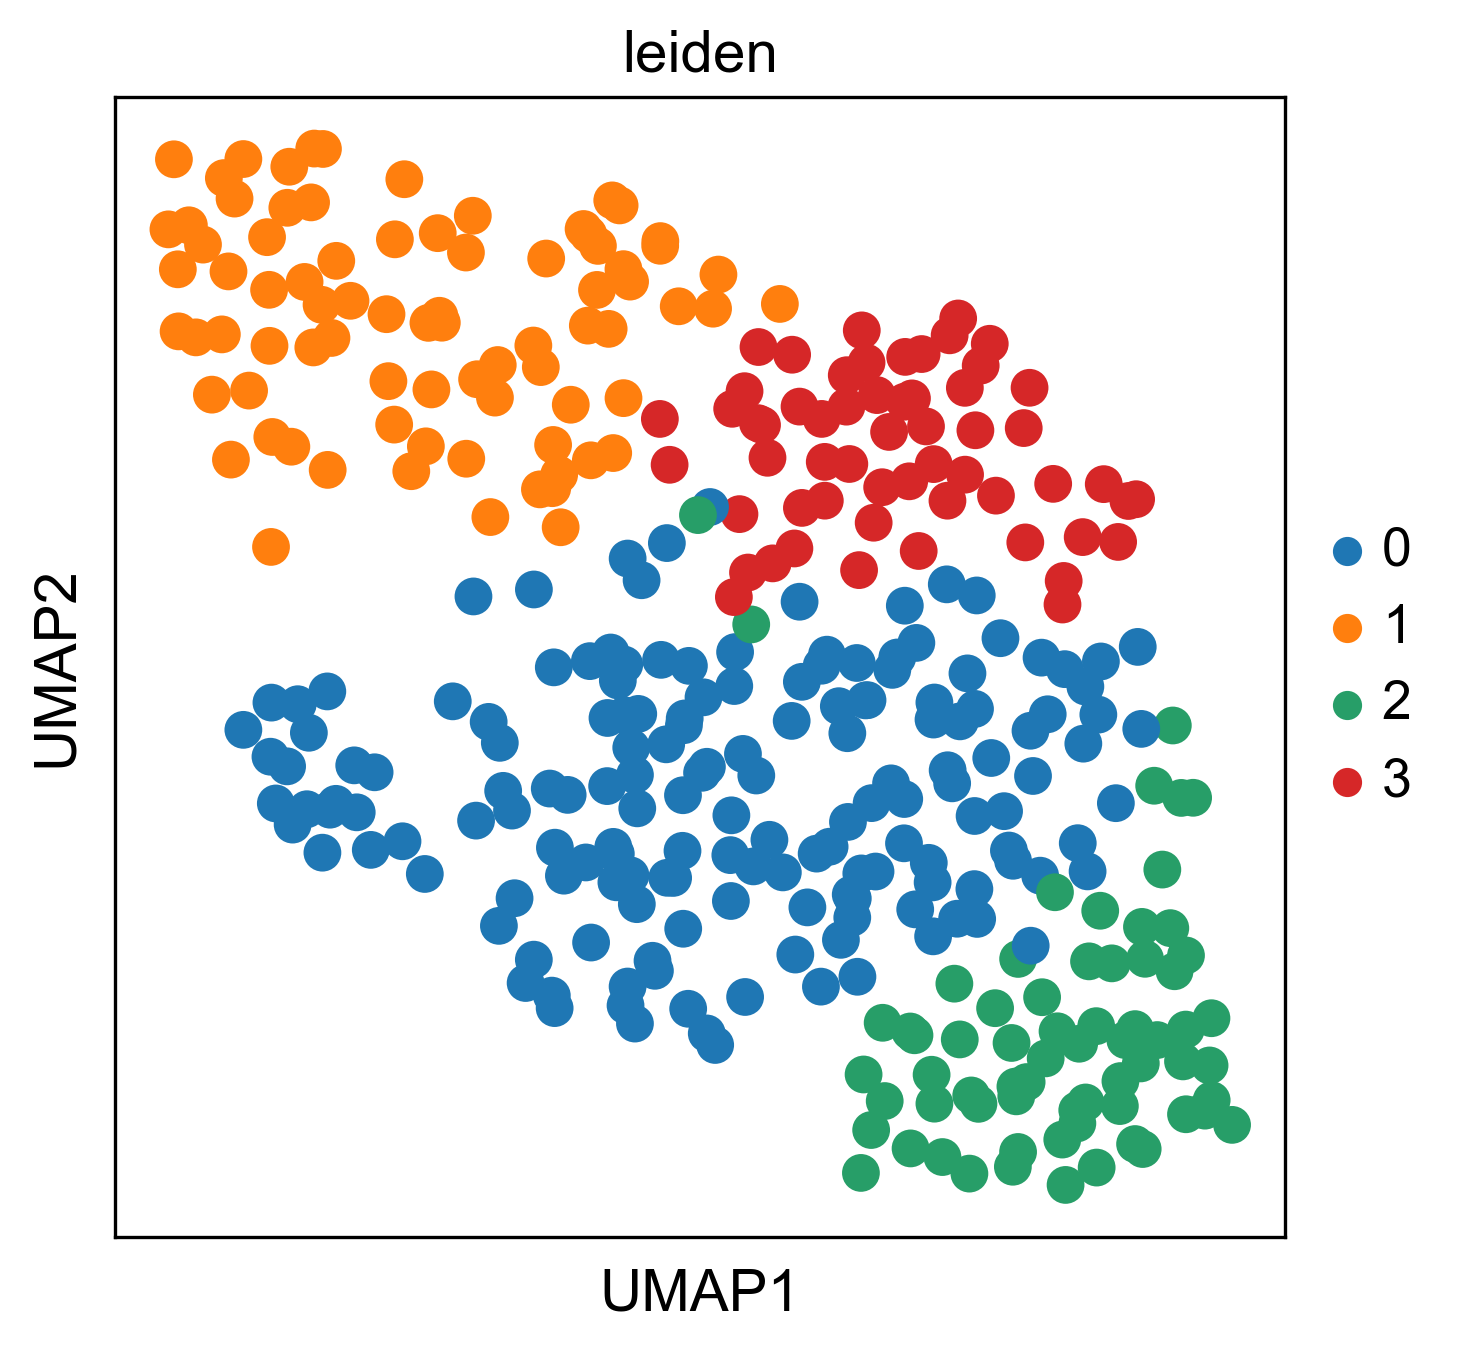

/var/folders/rx/h5zh41xj7v51m2tzdn3wt0pr0000gq/T/ipykernel_65146/1606802928.py:16: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adataHiVar.obs['leiden'].cat.reorder_categories(['0','1','2','3'], inplace=True)
/var/folders/rx/h5zh41xj7v51m2tzdn3wt0pr0000gq/T/ipykernel_65146/1606802928.py:17: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adataHiVar.obs['leiden_label'].cat.reorder_categories(['E','I1','I2','M'], inplace=True)


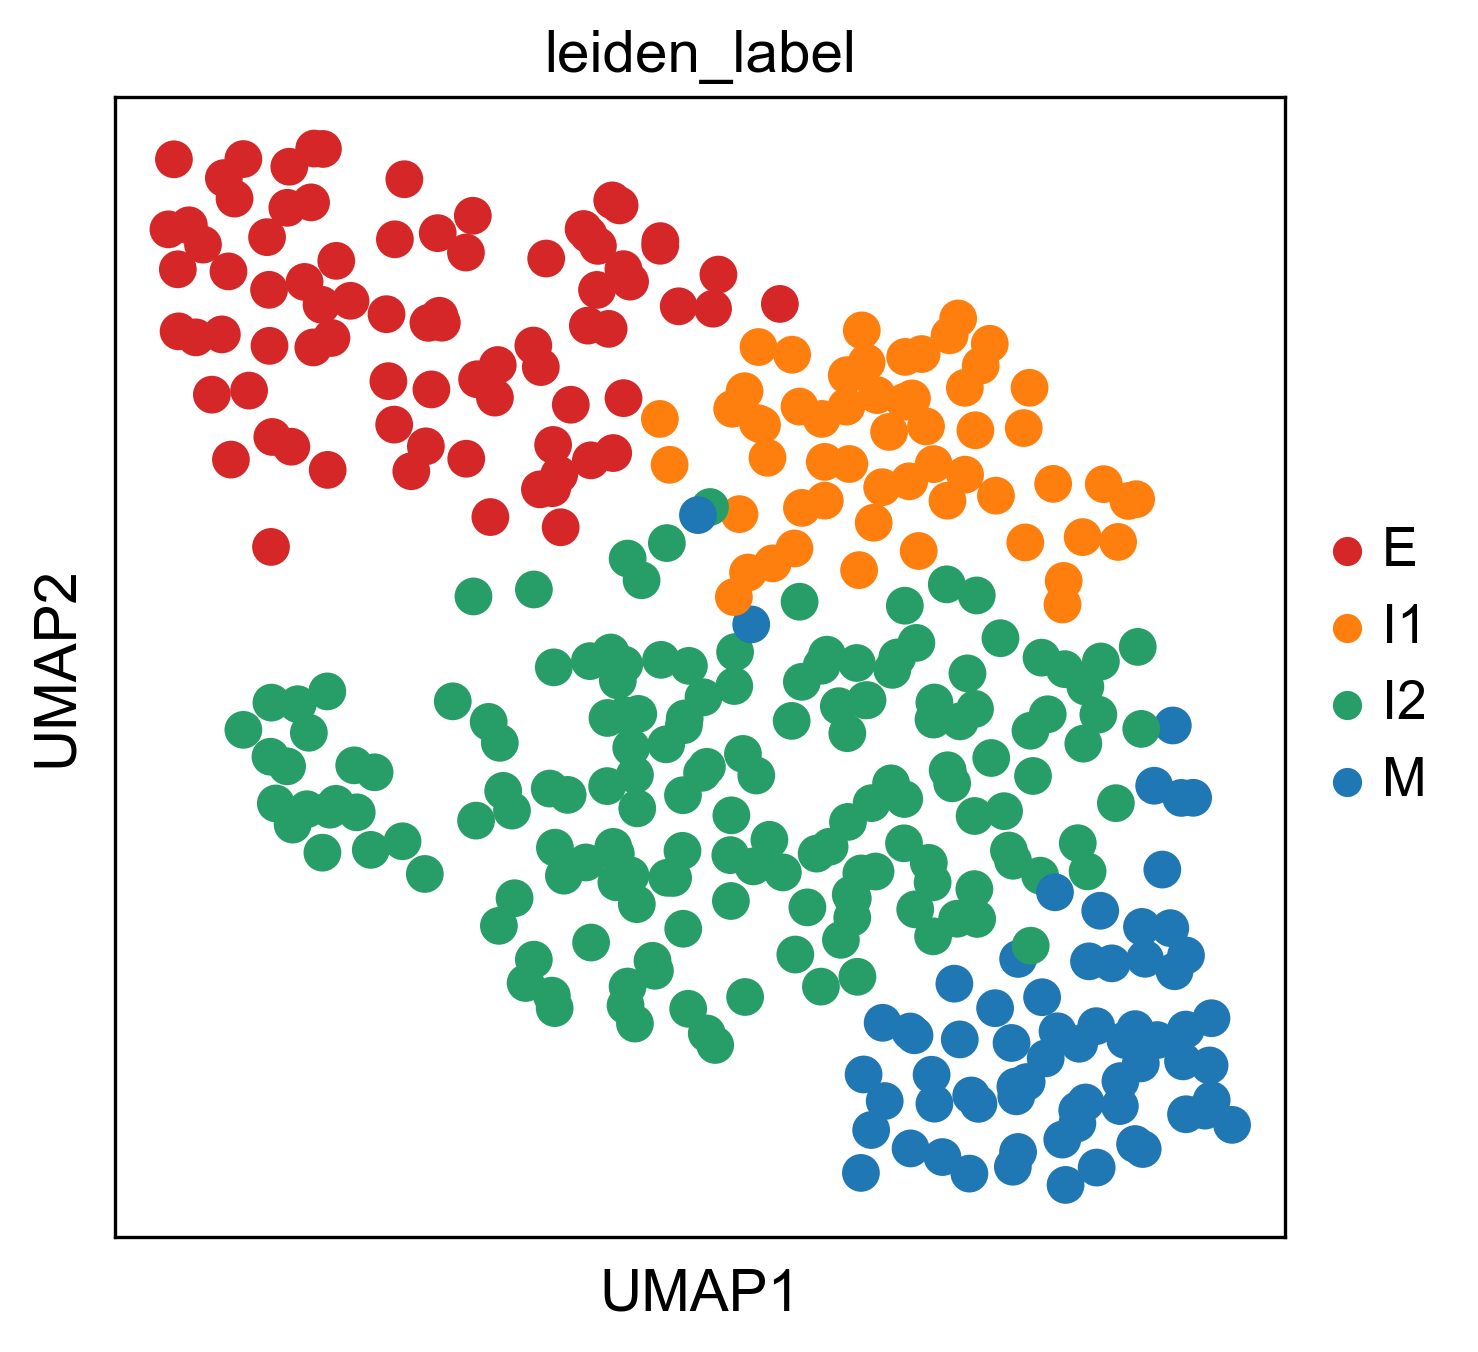

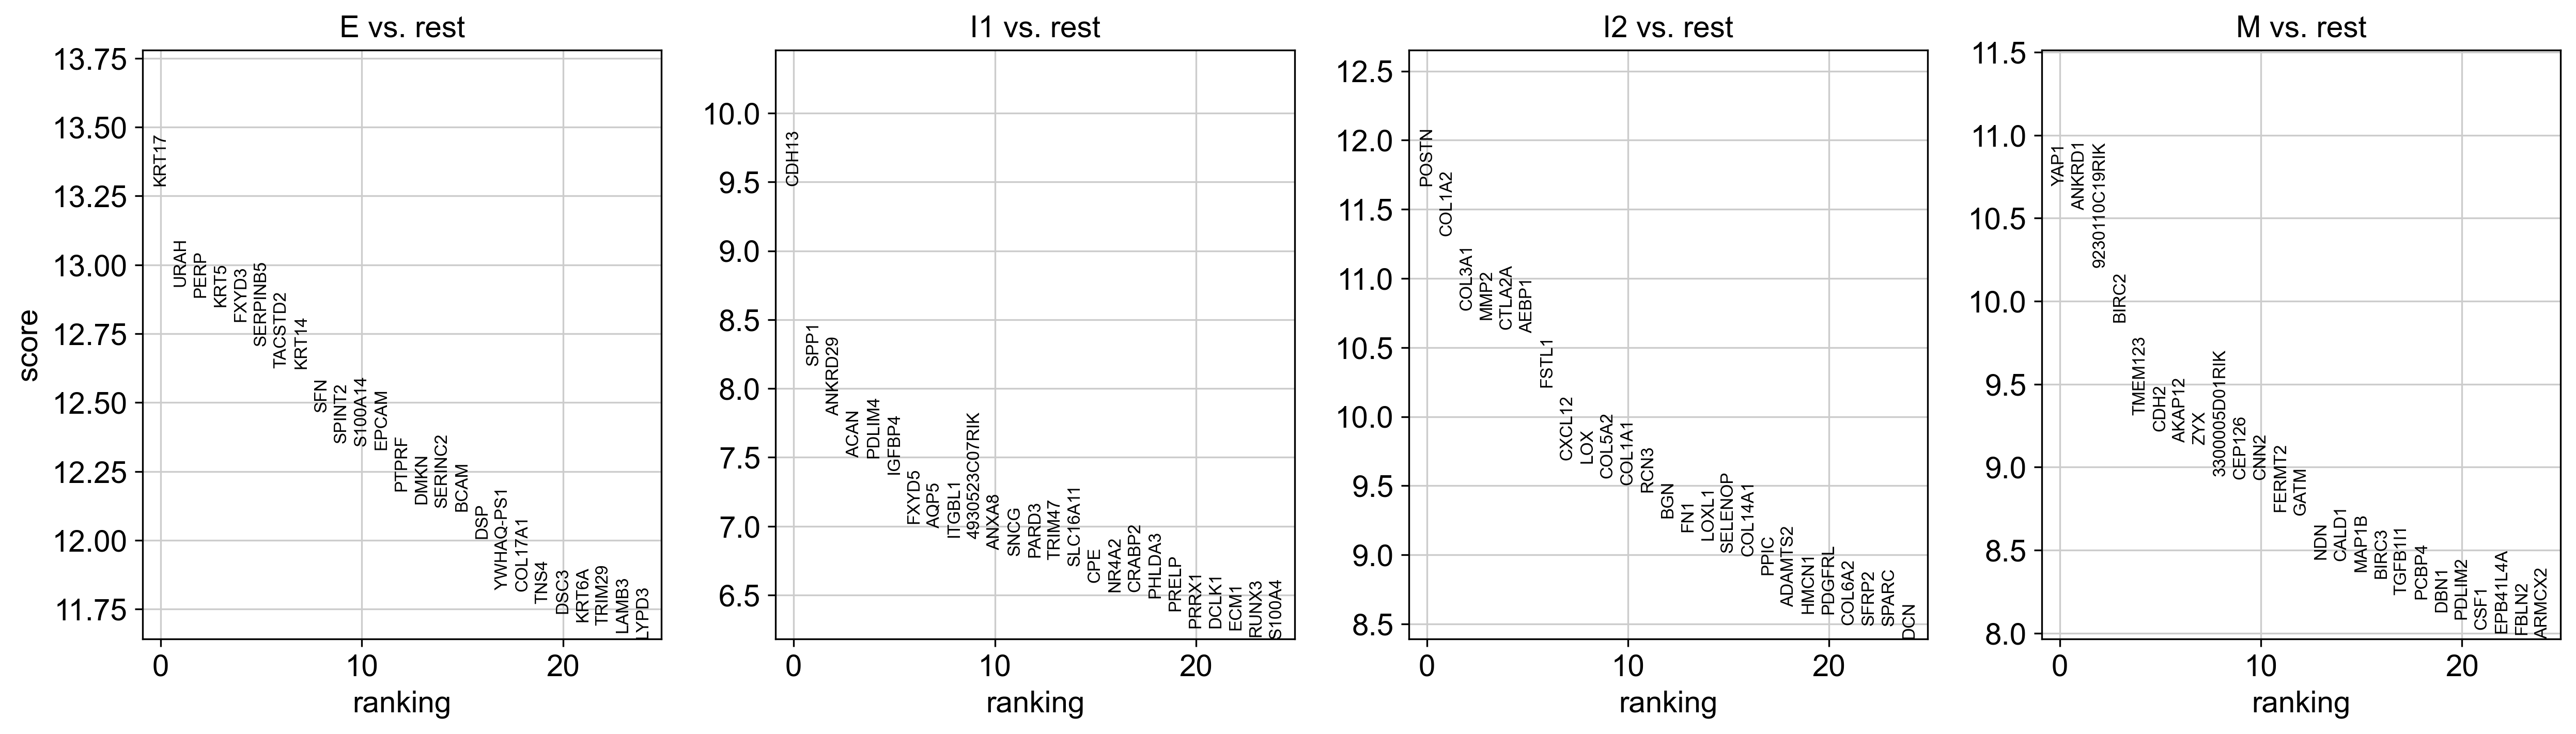

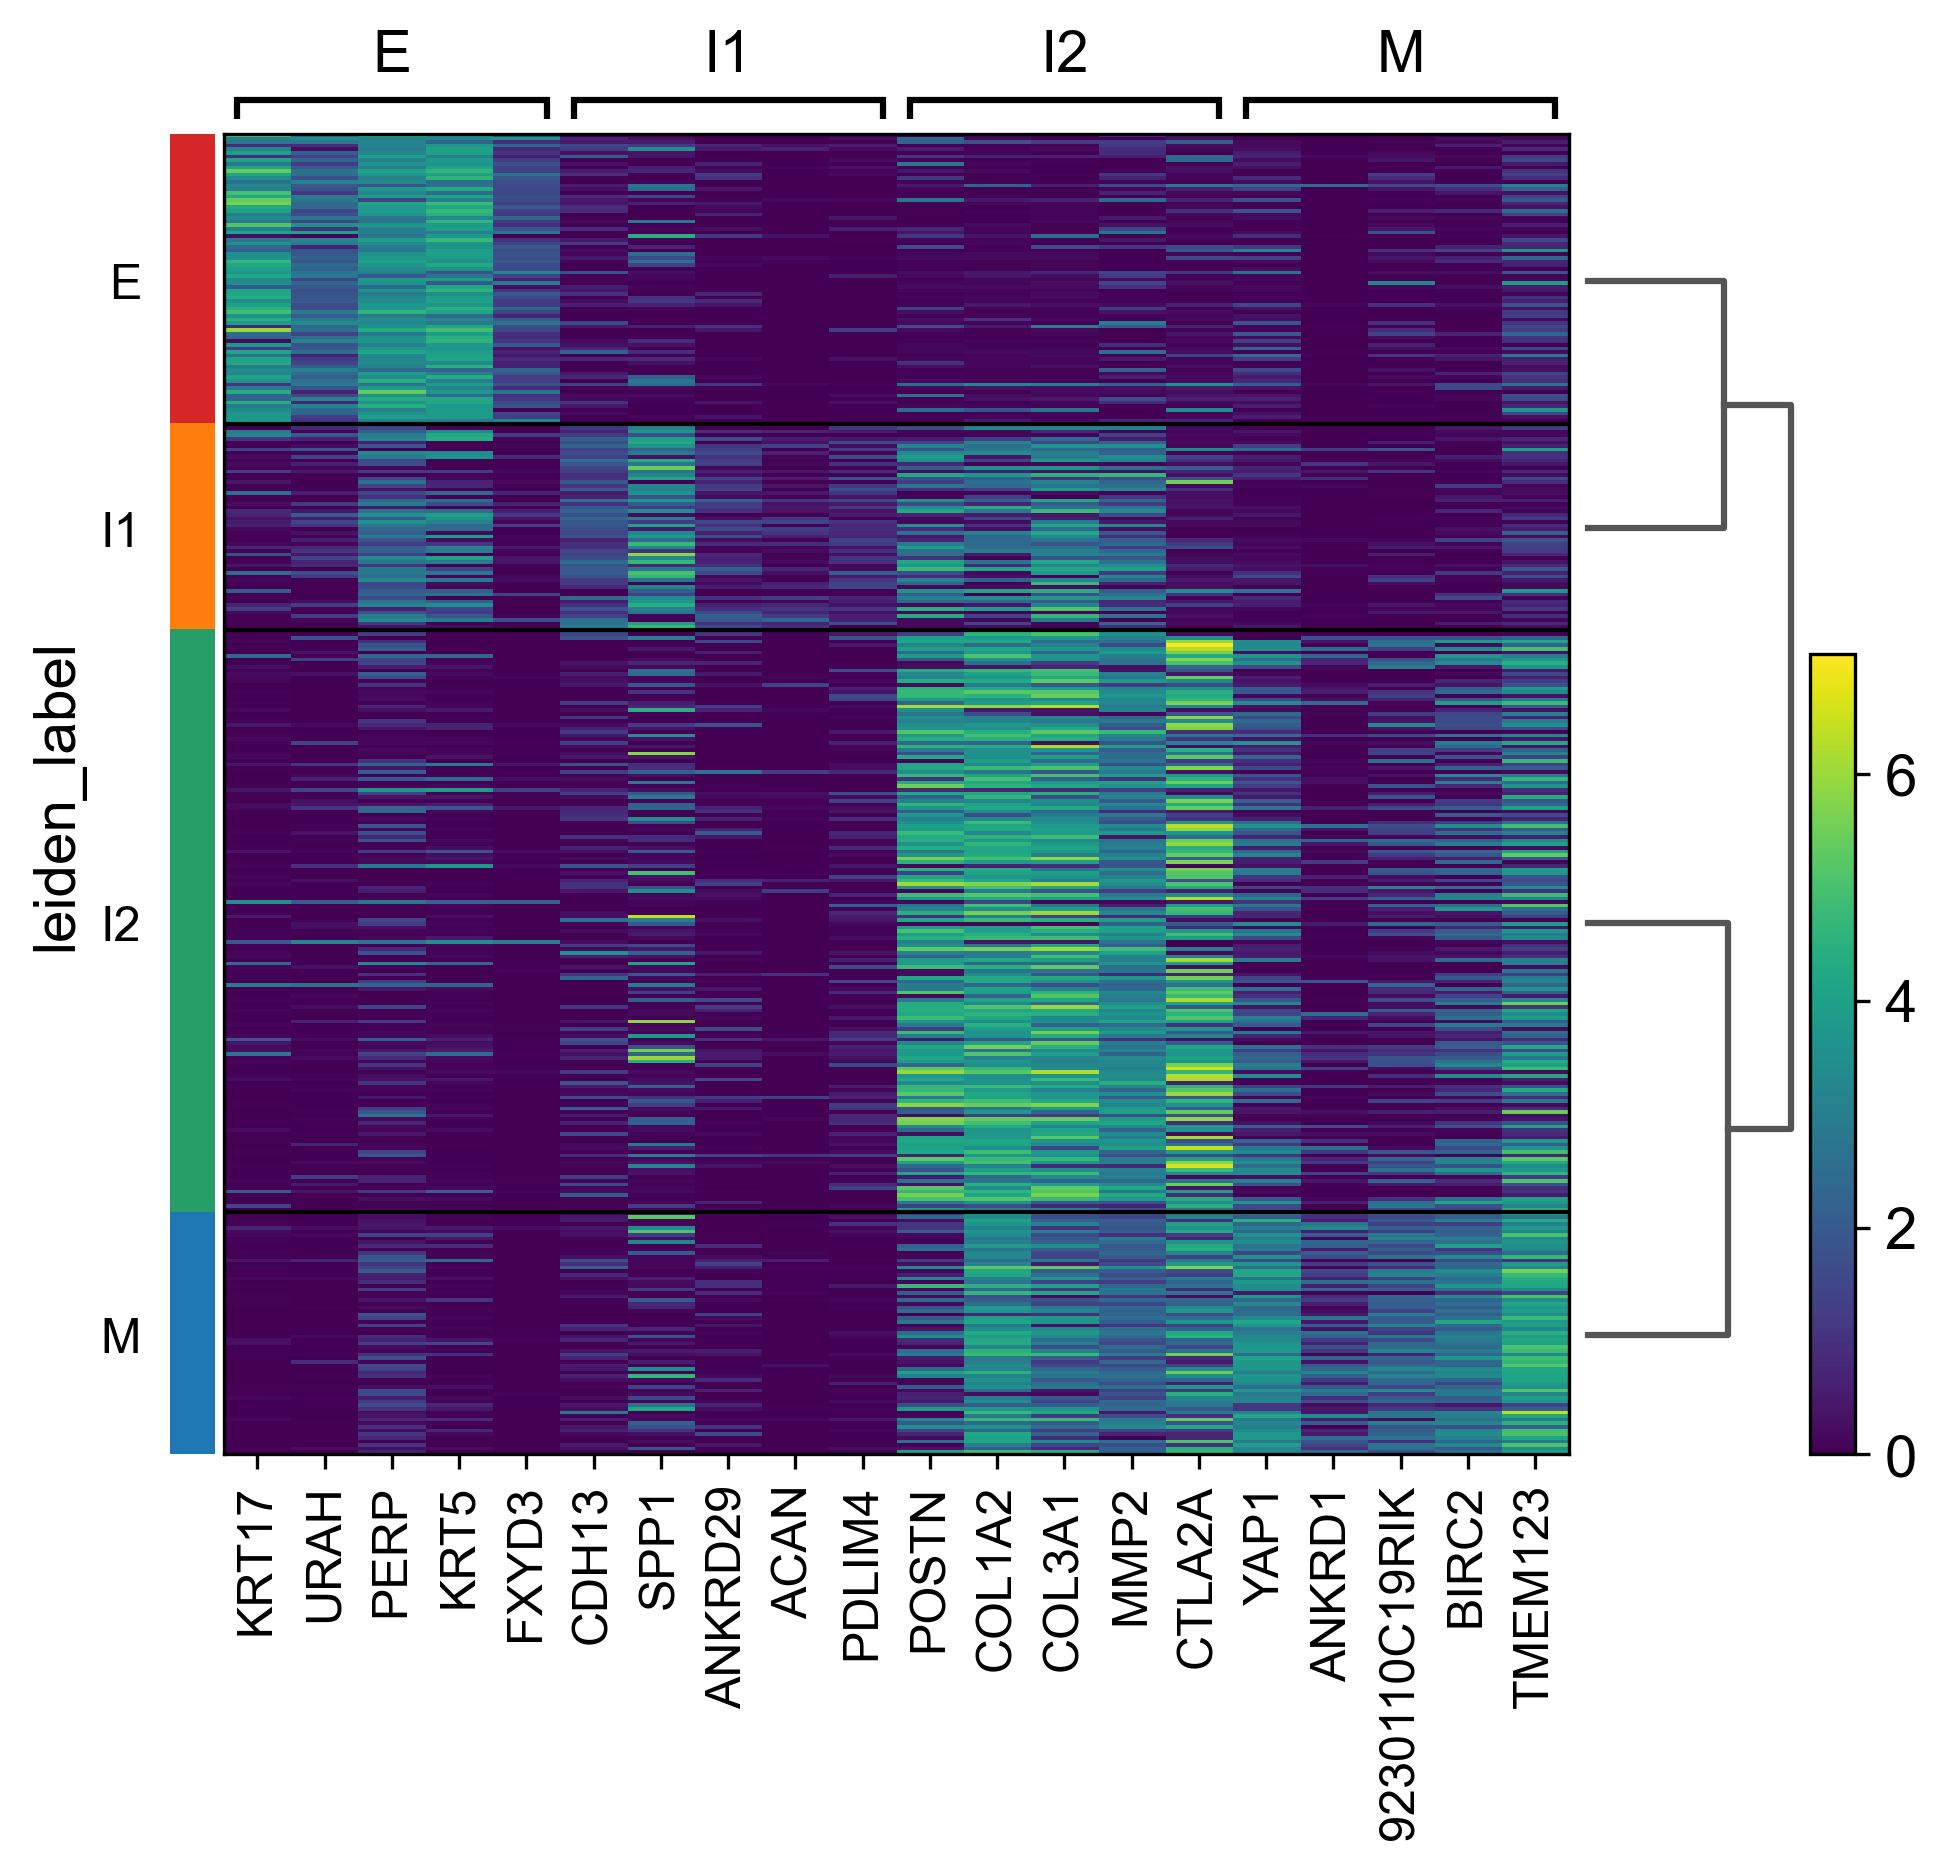

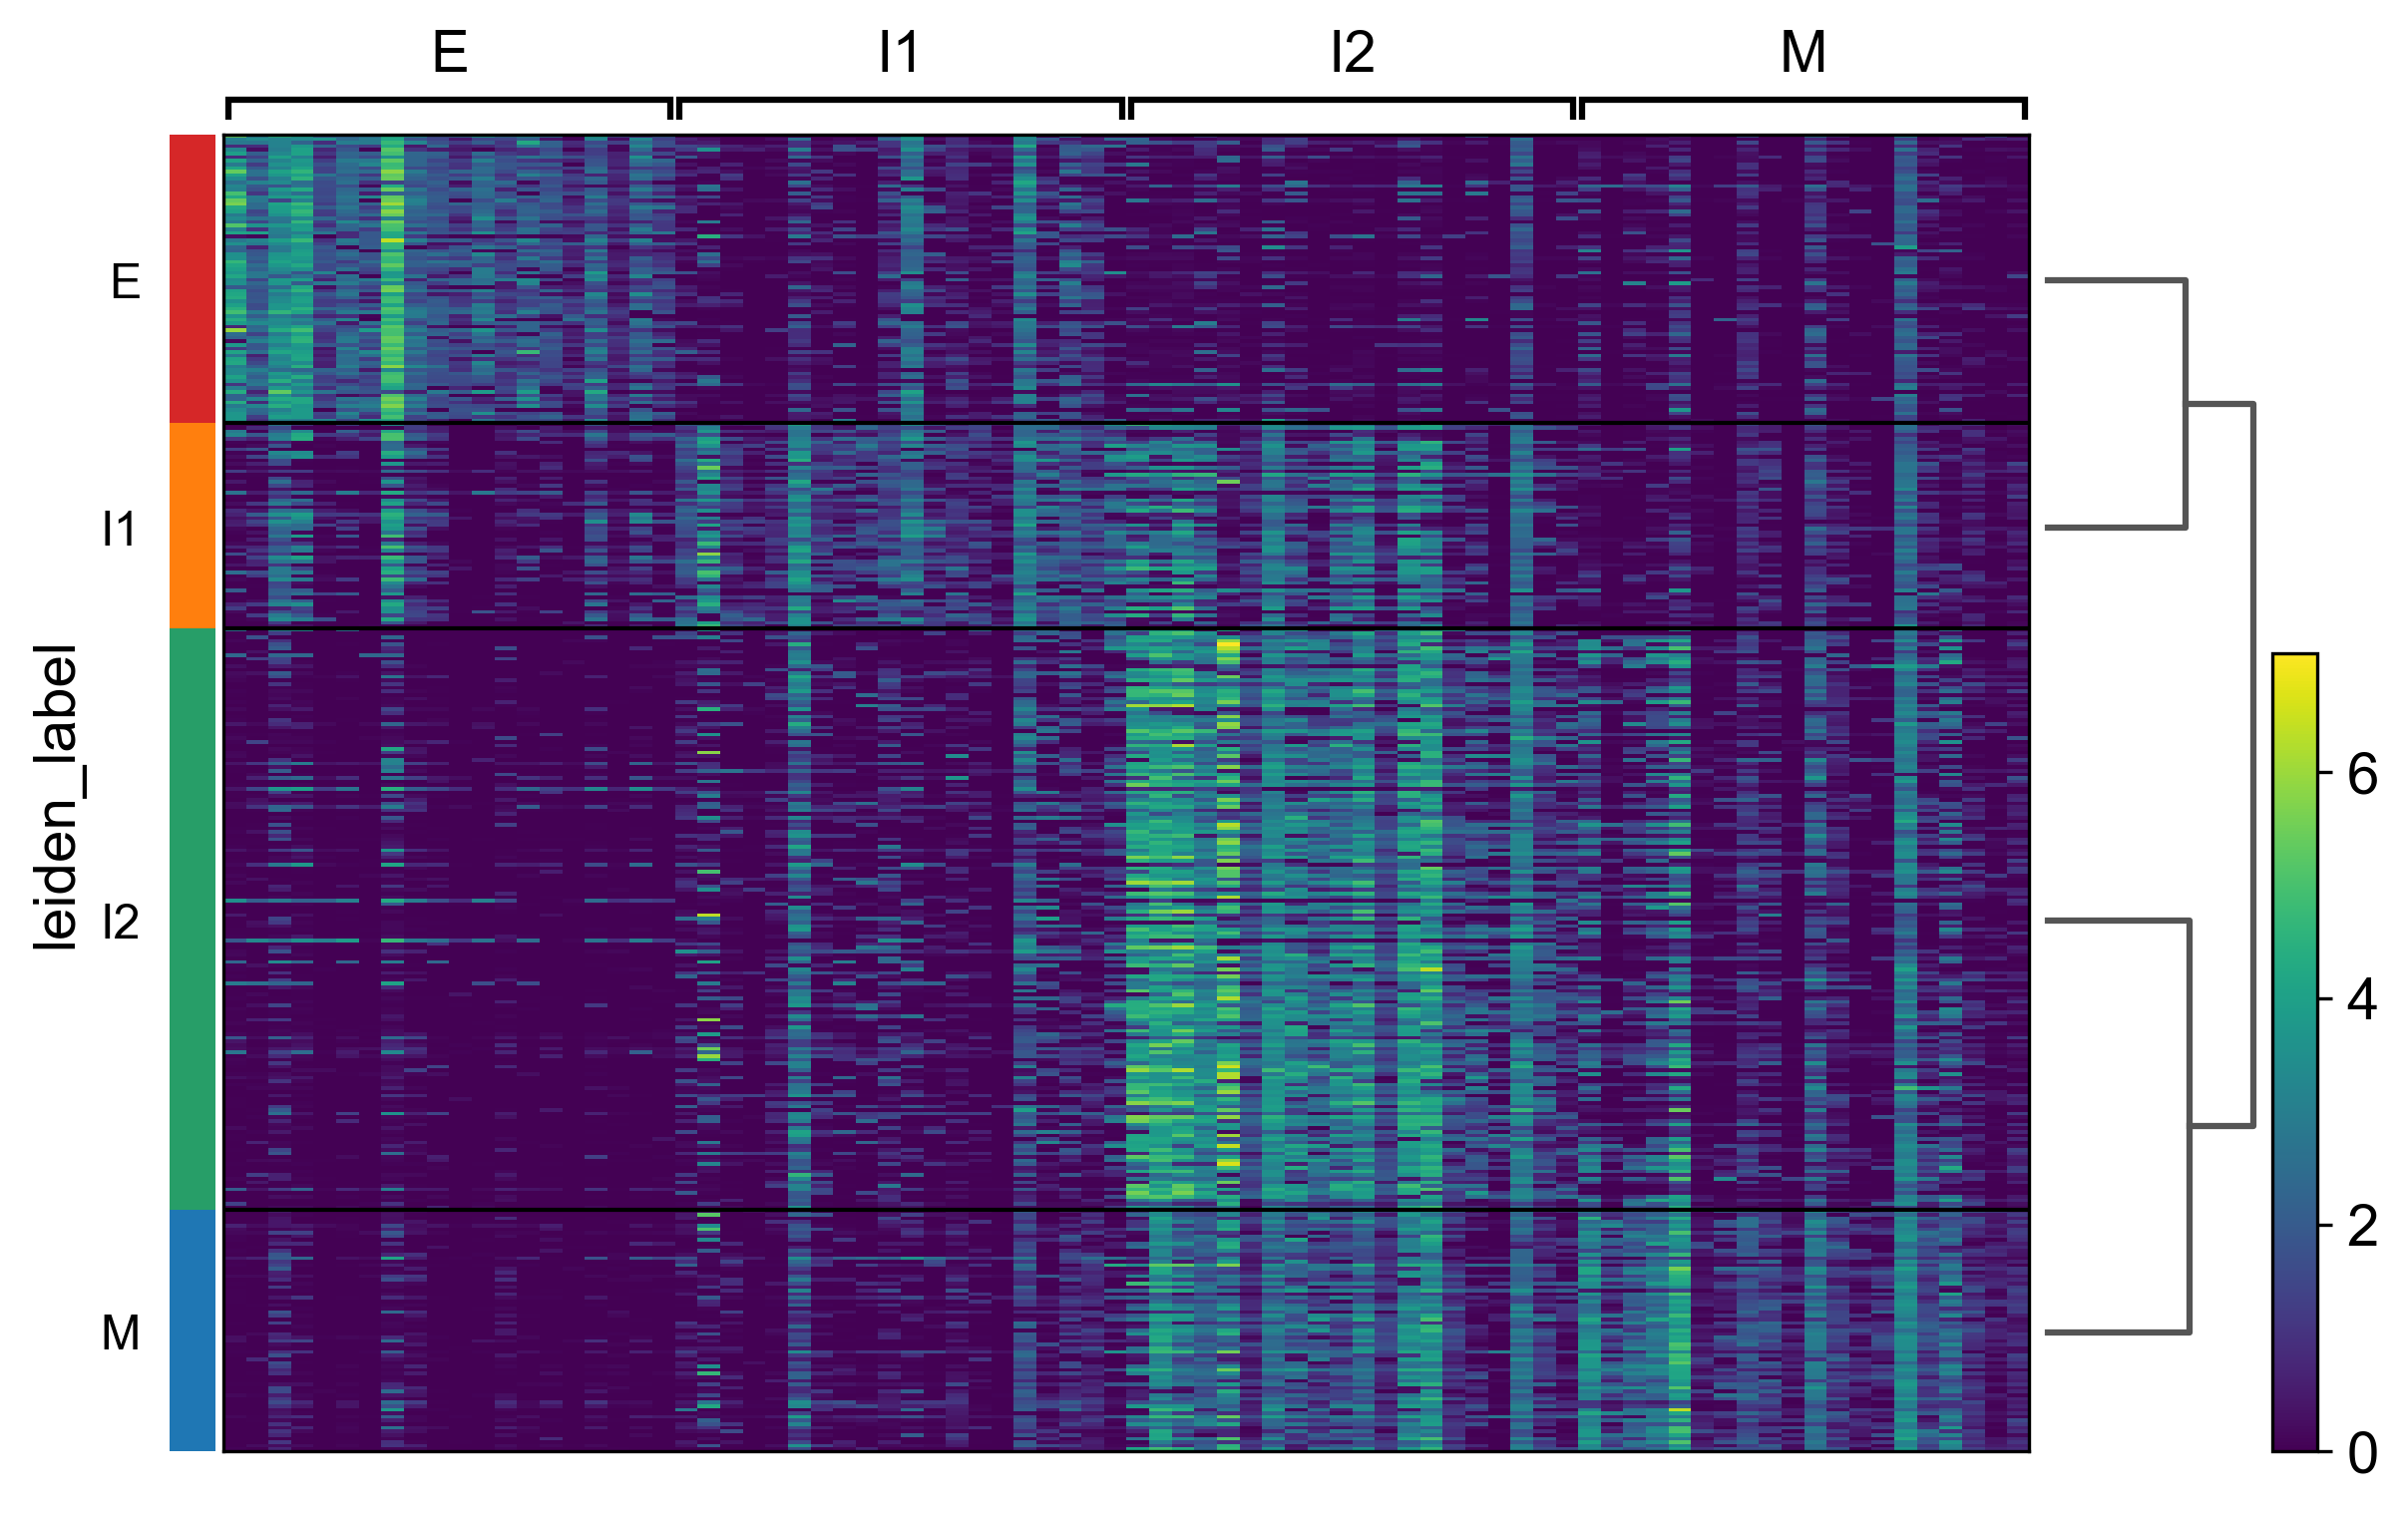

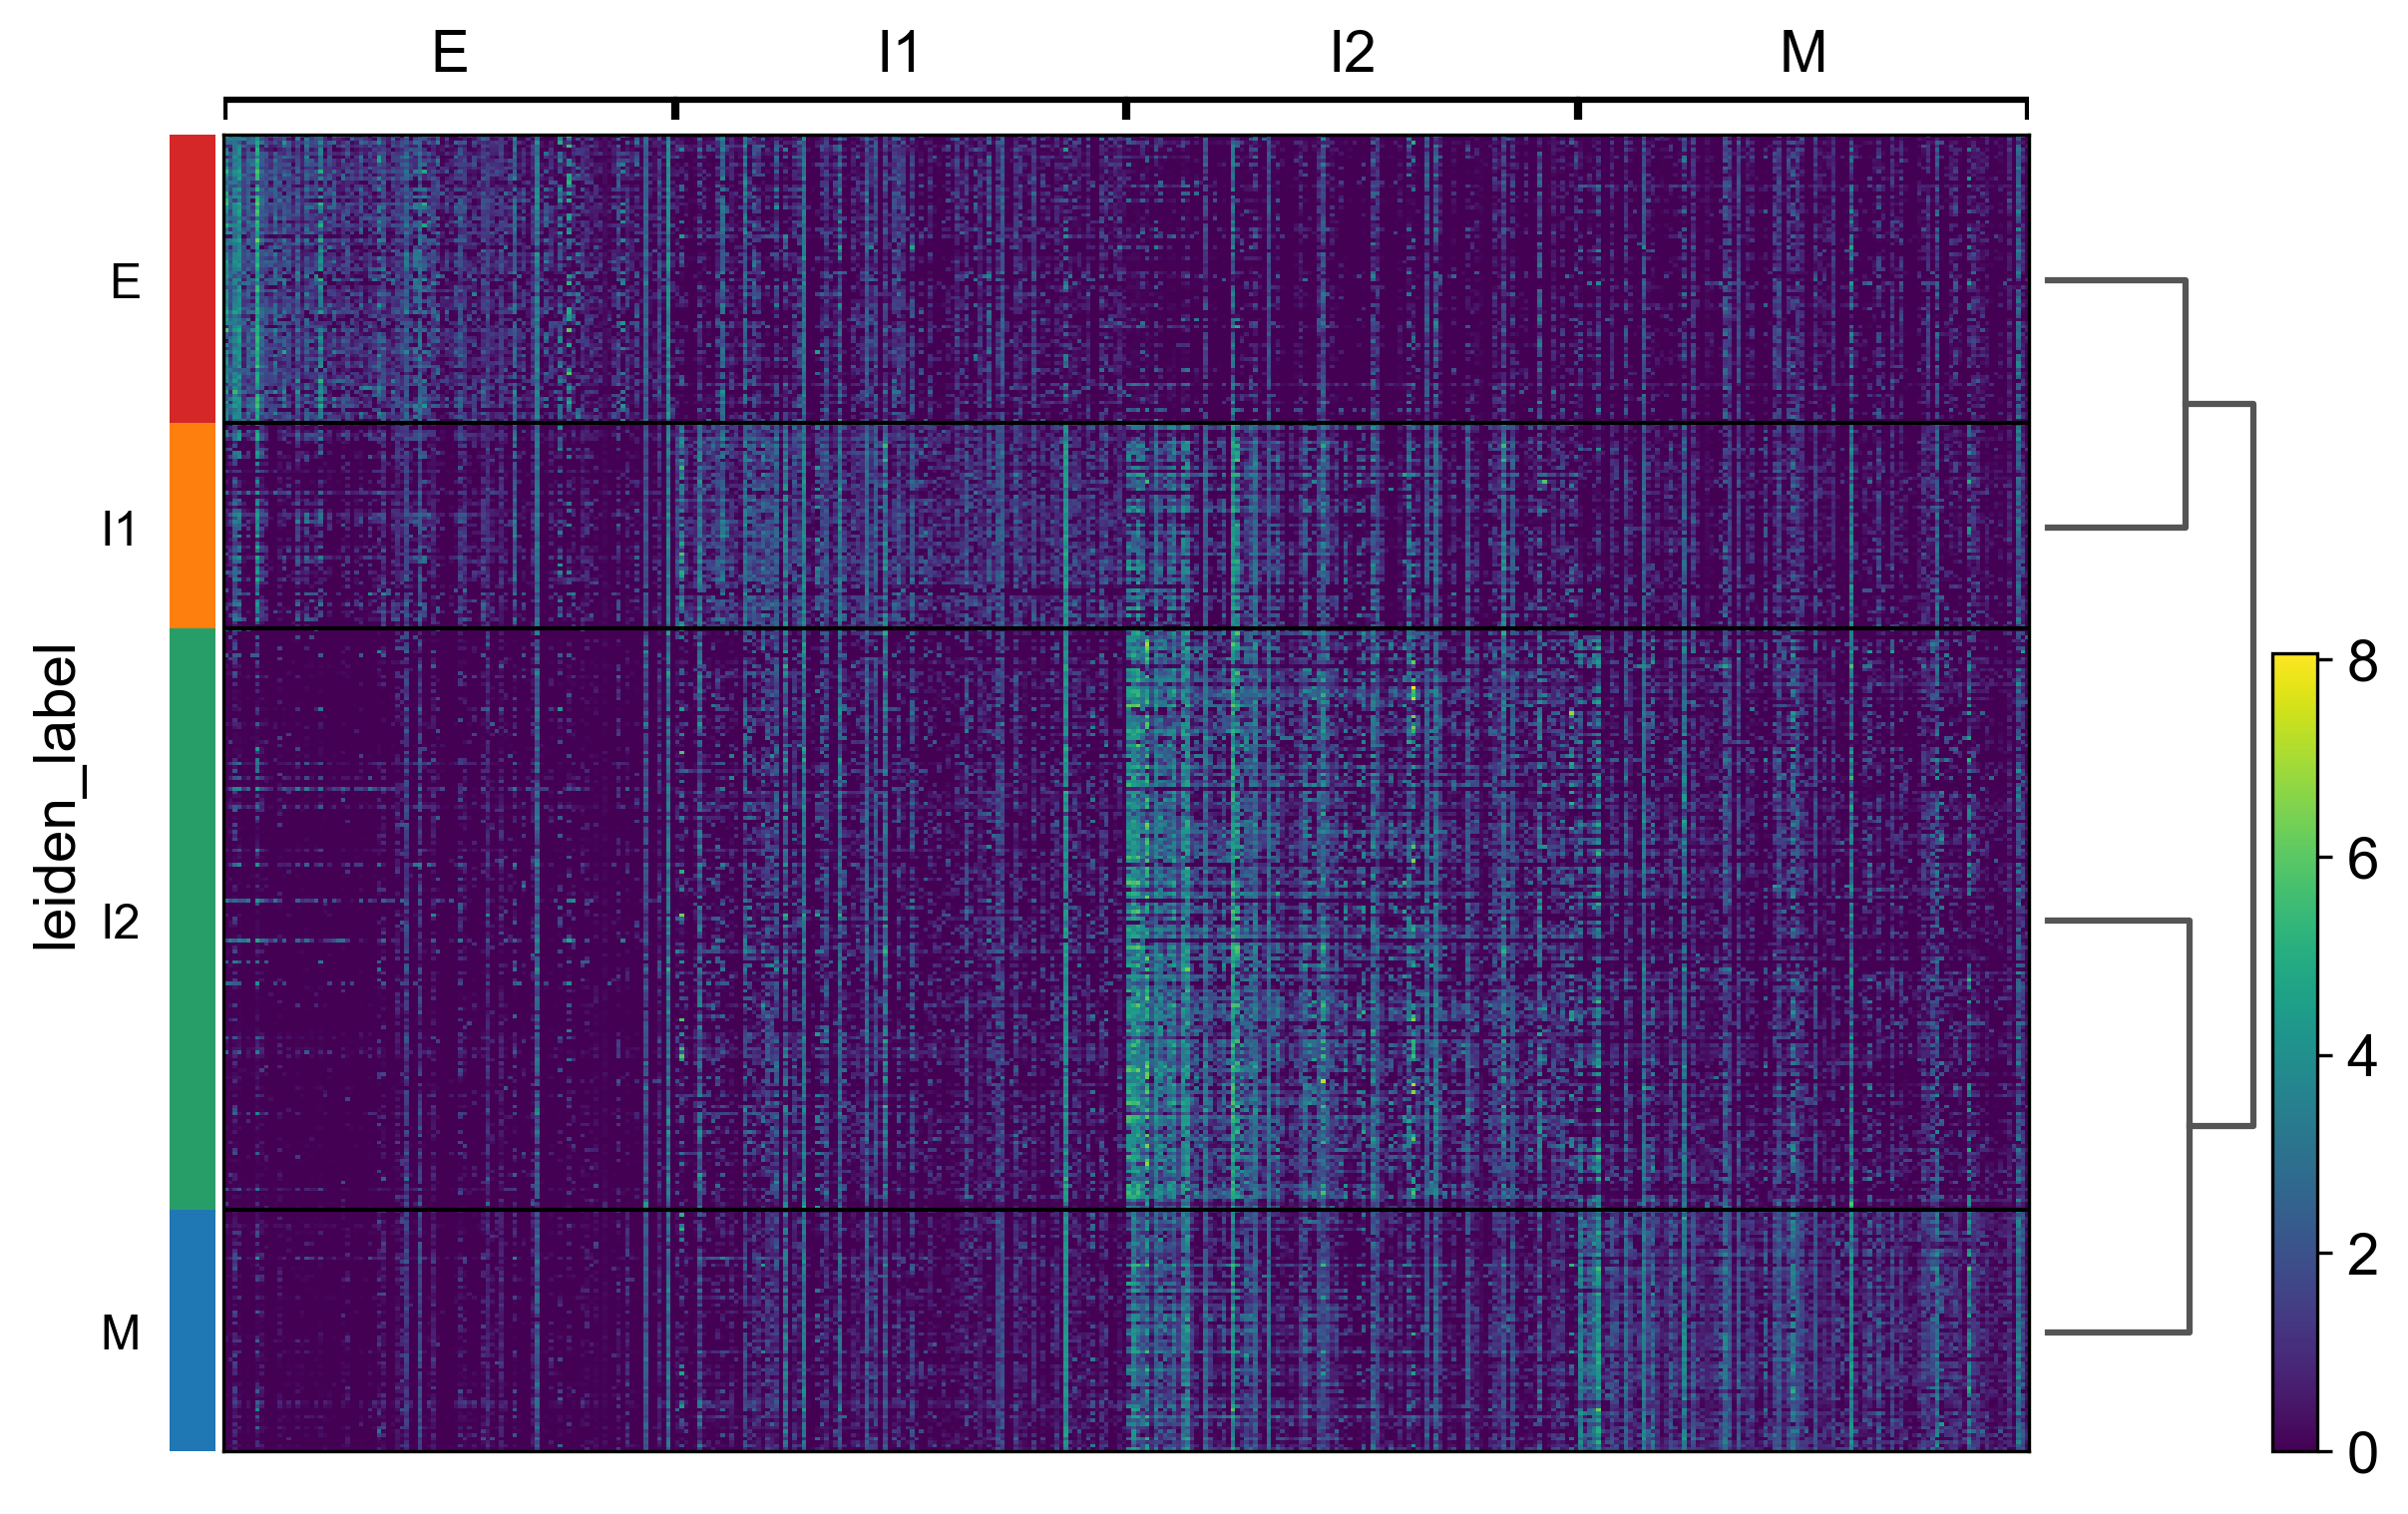

In [9]:
adataHiVar = leiden(adataHiVar, leiden_resolution, EMT_clusters_in_order)
adataHiVar = leiden_marker_genes(adataHiVar, dataset_name, run_name)
leiden_marker_genes_highlight(run_name, df_normalized)

In [10]:
# Export DE genes and log2FC for each cluster
for currCluster in adataHiVar.obs["leiden_label"].unique():
    cluster_DE_genes_export(adataHiVar, dataset_name, run_name, EMT_clusters_in_order, currCluster)

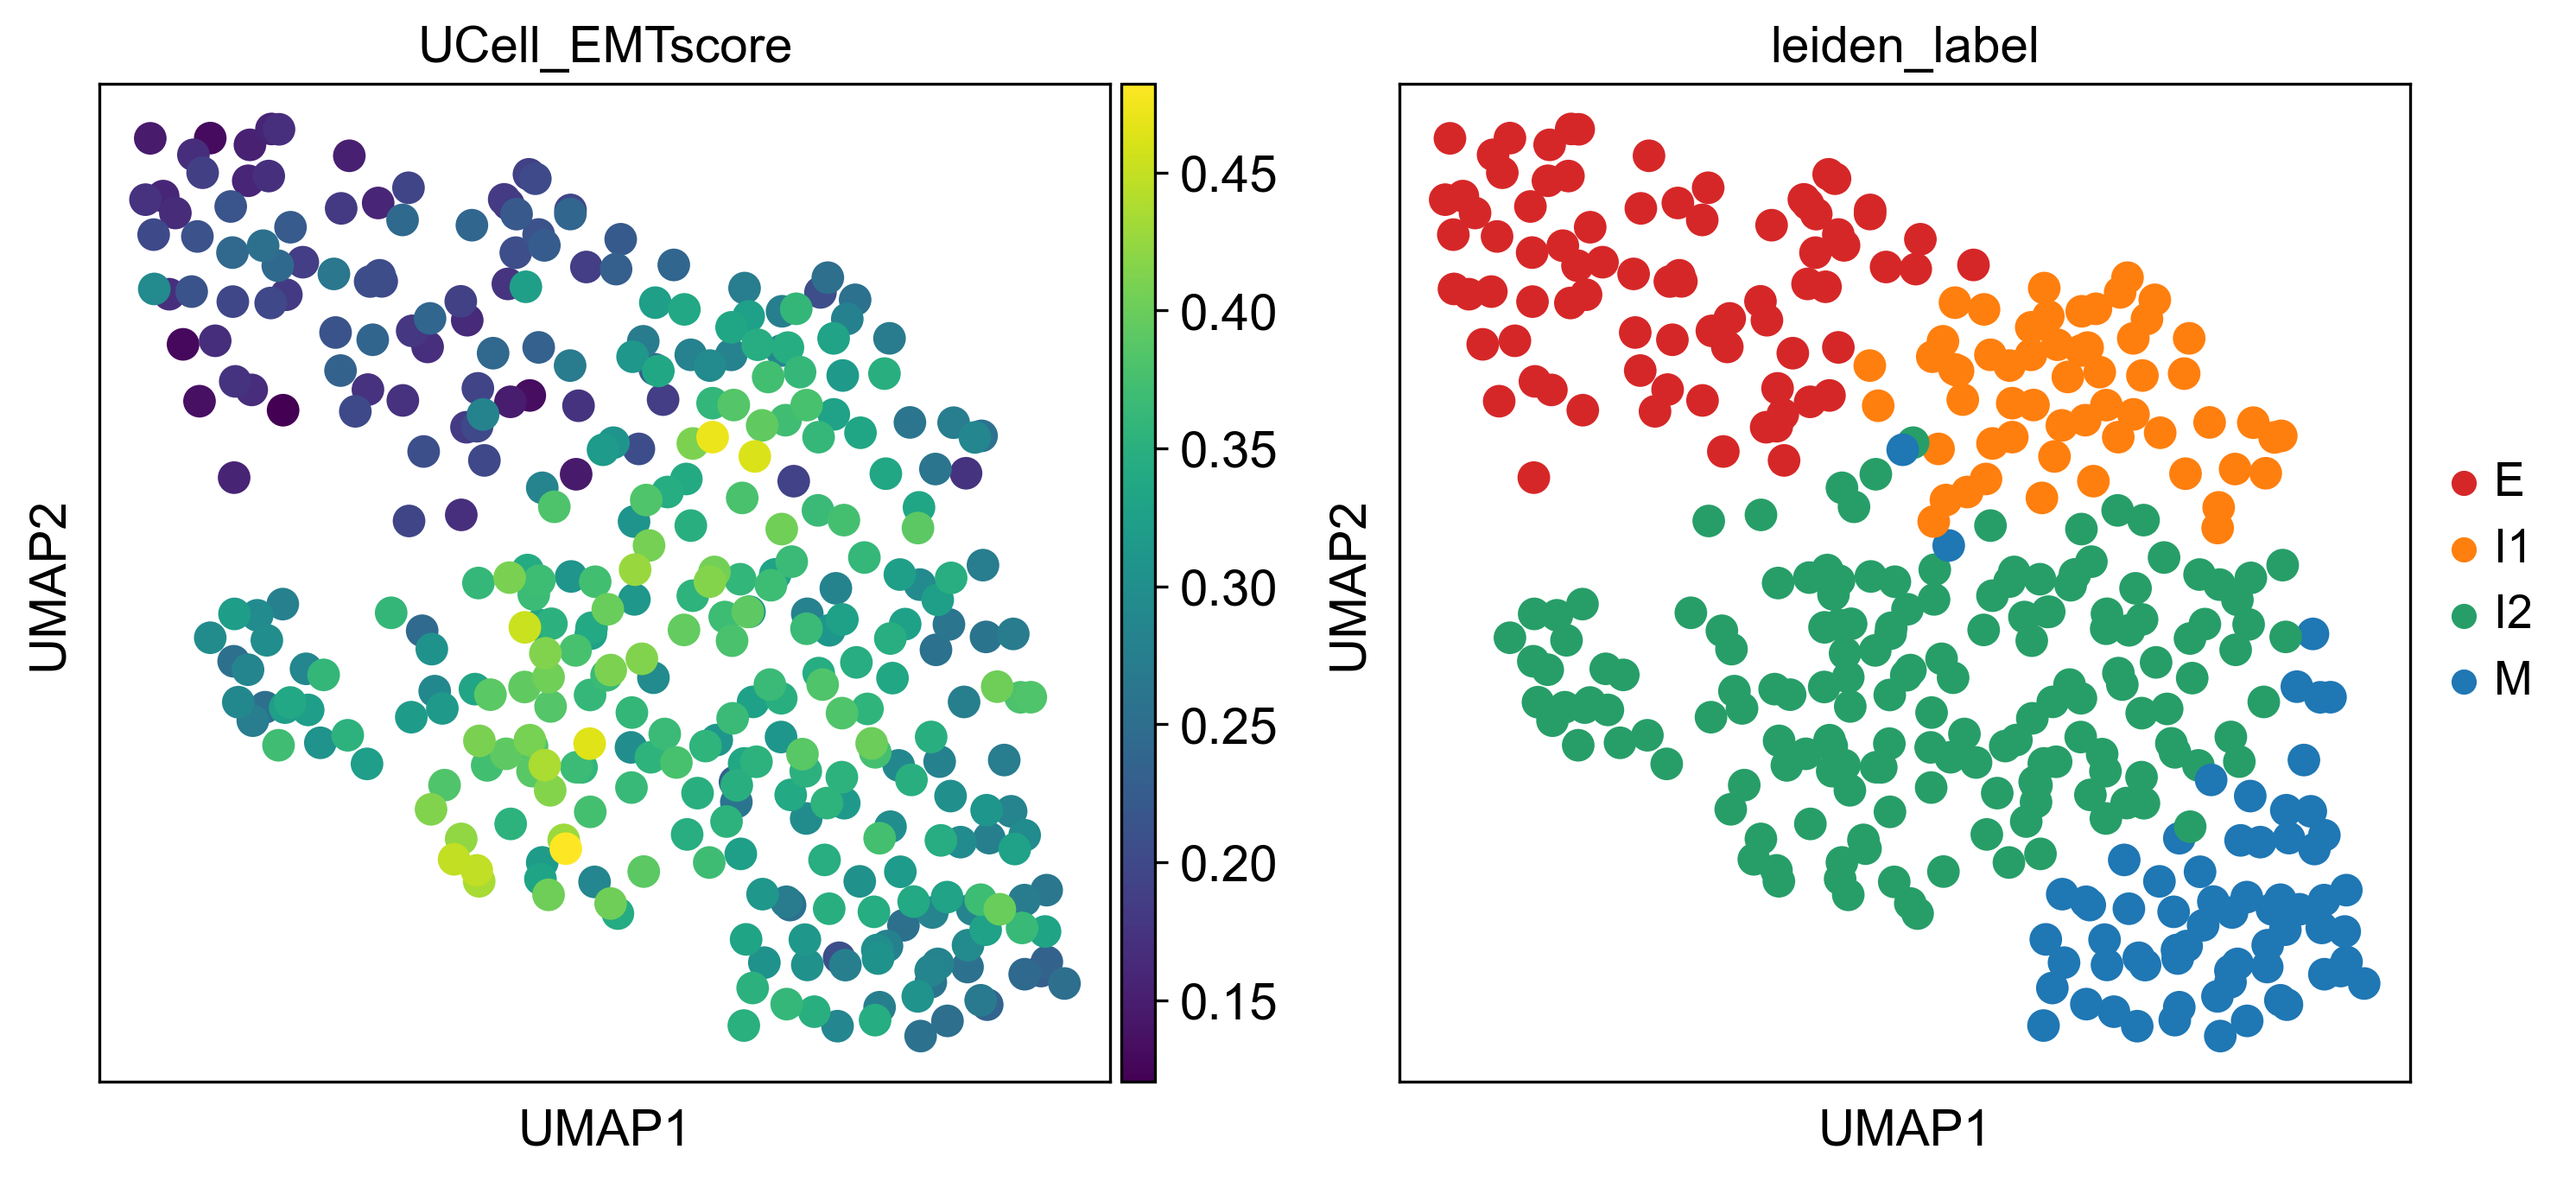

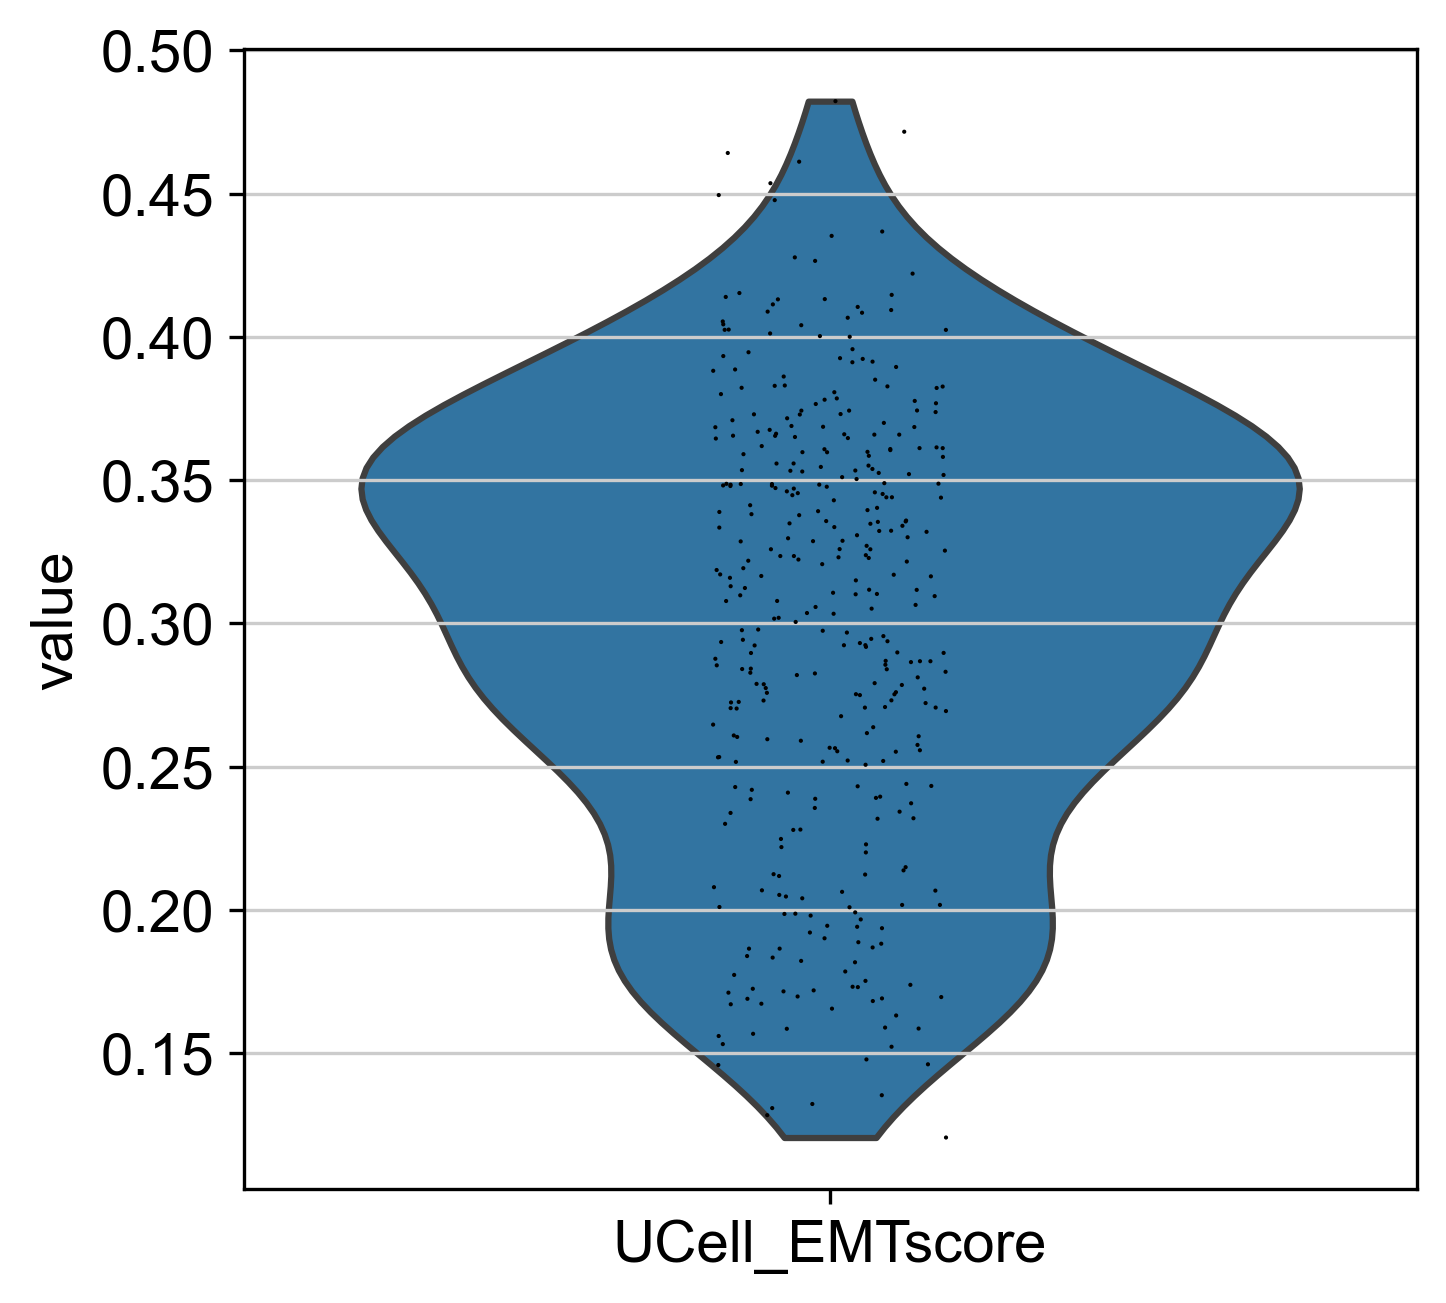

In [11]:
# EMTscore from UCell
adataHiVar = UCell_export_import(adataHiVar, run_name)
sc.pl.violin(adataHiVar, keys=["UCell_EMTscore"])

In [12]:
saveClusteredData(adataHiVar, run_name)

## Part 3: PSEUDOTIME

In [13]:
adataHiVar = importClusteredData(dataset_name, run_name)
adataHiVar = diffmap(adataHiVar)
root_nodes = pseudotime_rootNodes(adataHiVar, pseudotime_DC, pseudotime_DC_rootNodes)
adataHiVar, df_pseudotime = pseudotime_mean(adataHiVar, root_nodes)
savePseudotimeData(adataHiVar, run_name)

In [14]:
pseudotime_per_cluster(adataHiVar, EMT_clusters_in_order, run_name, df_pseudotime, numBins=12)